<a href="https://colab.research.google.com/github/chetansgode/Health_Insurance_Cross_Sales_Prediction_classification/blob/main/Health_Insurance_Cross_Sales_Prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sales Prediction



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual



# **Project Summary -**

  *      Insurance  company has provided Health insurance to its customers and Now They want to expand their bussiness in Vahicle insurance So they want model to predict wheather the customers or Health insurance policy Holder will be intersted in Vahicle insurance or not.
  *      Just like Medical Insurance, there is Vehicle Insurance where every year customers needs to pay certain amount of premium to insurance provider company so that in case of unfortunate accident by vehicle,then insurance company will provide a compensation  to the customers.


# **GitHub Link -**

https://github.com/chetansgode/Health_Insurance_Cross_Sales_Prediction_classification.git

# **Problem Statement**


**Insurance Company want to expand their bussiness in Vahicle insurance So they want model to predict wheather the customers or Health insurance policy Holder will be intersted in Vahicle insurance or not.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# import library
import numpy as np
import pandas as pd
# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
%lsmagic
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for ml module creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,PowerTransformer
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# To feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape
print('dataset has no of row - ',df.shape[0])
print('dataset has no of column - ',df.shape[1])

dataset has no of row -  381109
dataset has no of column -  12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Dataset has no of Duplicate values - ',df.duplicated().sum())

Dataset has no of Duplicate values -  0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values= df.isna().sum().sum()
print(f"Dataset has no of Null values -{missing_values}" )

Dataset has no of Null values -0


In [ ]:
# Visualizing the missing values
# No missing value in data set.

#### Feature Engineering

In [ ]:
# Need to convert categorical value into numerical format

#1--Replace Gender type male by 1 and female by 0 (categorical feature)

df['Gender']=np.where(df['Gender']=='Male',1,0)


#2--Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2)

df['Vehicle_Age']=df['Vehicle_Age'].apply(lambda x : 0 if x=='< 1 Year' else (1 if x== '1-2 Year' else 2))

#3--Replace Vehicle_Damage (Yes by 1 & No by 0)

df['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda x : 1 if x=='Yes' else 0)

#4--Replace Annual_Premium (0 < x <= 25000 by 0, 25000 < x <= 50000 by 1,50000 < x <= 75000  by 2,75000 < x <= 100000 by 3,100000 < x <= 200000 by 4,200000 < x <= 300000 by 5,300000 < x <= 400000 by 6,400000 < x <= 500000 by 7, above 500000 by 8)

df['Annual_Premium']=df['Annual_Premium'].apply(lambda x : 0 if 0 < x <= 25000 else(1 if 25000 < x <= 50000 else(2 if 50000 < x <= 75000 else(3 if 75000 < x <= 100000 else(4 if 100000 < x <= 200000 else(5 if 200000 < x <= 300000 else(6 if 300000 < x <= 400000 else(7 if 400000 < x <= 500000 else 8))))))))

# Drop id columns
df.drop('id',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  int64  
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 32.0 MB


### What did you know about your dataset?

* Dataset has 12 features and 381109 records.
* There are 8 categorical feature outof 12.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe()

Gender            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean        0.540761      38.822584         0.997869      26.388807   
std         0.498336      15.511611         0.046110      13.229888   
min         0.000000      20.000000         0.000000       0.000000   
25%         0.000000      25.000000         1.000000      15.000000   
50%         1.000000      36.000000         1.000000      28.000000   
75%         1.000000      49.000000         1.000000      35.000000   
max         1.000000      85.000000         1.000000      52.000000   

       Previously_Insured    Vehicle_Age  Vehicle_Damage  Annual_Premium  \
count       381109.000000  381109.000000   381109.000000   381109.000000   
mean             0.458210       0.609616        0.504877        0.830728   
std              0.498251       0.567439        0.499977        0.600560   
min              0.000000       0.000000        0.000000        0.000000   
25%              0.000000       0.000000        0.000000        0.000000   
50%              0.000000       1.000000        1.000000        1.000000   
75%              1.000000       1.000000        1.000000        1.000000   
max              1.000000       2.000000        1.000000        8.000000   

       Policy_Sales_Channel        Vintage       Response  
count         381109.000000  381109.000000  381109.000000  
mean             112.034295     154.347397       0.122563  
std               54.203995      83.671304       0.327936  
min                1.000000      10.000000       0.000000  
25%               29.000000      82.000000       0.000000  
50%              133.000000     154.000000       0.000000  
75%              152.000000     227.000000       0.000000  
max              163.000000     299.000000       1.000000

### Variables Description

* Describing each Features
 * 'id'-Unique id for customers
 * 'Gender'- male or female (1 for male and 0 for famale) (Categorical)
 * 'Driving_License'- Customers has driving licence or not(1 for yes and 0 for no)(categorical)
 * 'Region_Code'-unique code for region of customers (categorical)
 * 'Previously_Insured'-Already has insurance or not(1 for yes and 0 for no) (categorical)

 * 'Vehicle_Age'-Age of vehicle Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2) (categorical)
 * 'Vehicle_Damage'-damage or not (yes by 1 and no by 0) (categorical)
 * 'Annual_Premium'-The amount need to pay as premium (categorical)
 * 'Policy_Sales_Channel'-To reach customer process types (categorical)
 * 'Vintage'-no of day customers associated with company (numerical)
 * 'Response'- customer interested or not (yes by 1 and no by 0)

### Check Unique Values for each variable.

feature :- Gender
No of unique value :- 2
No of value count :-
 1    206089
0    175020
Name: Gender, dtype: int64


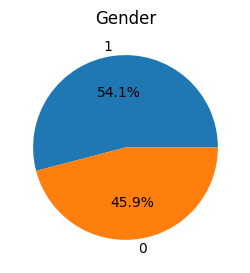

--------------------------------------------------------------------------------
feature :- Age
No of unique value :- 66
No of value count :-
 24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64


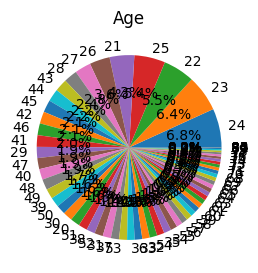

--------------------------------------------------------------------------------
feature :- Driving_License
No of unique value :- 2
No of value count :-
 1    380297
0       812
Name: Driving_License, dtype: int64


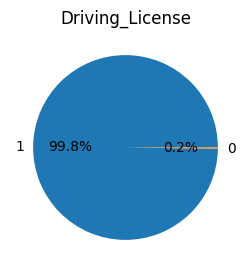

--------------------------------------------------------------------------------
feature :- Region_Code
No of unique value :- 53
No of value count :-
 28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64


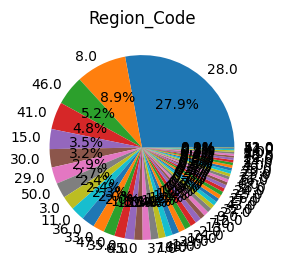

--------------------------------------------------------------------------------
feature :- Previously_Insured
No of unique value :- 2
No of value count :-
 0    206481
1    174628
Name: Previously_Insured, dtype: int64


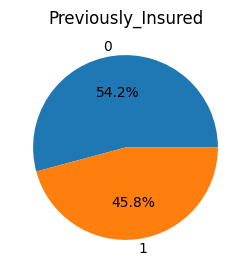

--------------------------------------------------------------------------------
feature :- Vehicle_Age
No of unique value :- 3
No of value count :-
 1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64


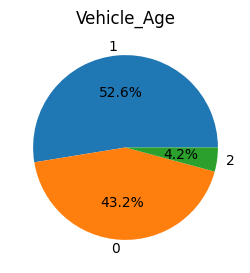

--------------------------------------------------------------------------------
feature :- Vehicle_Damage
No of unique value :- 2
No of value count :-
 1    192413
0    188696
Name: Vehicle_Damage, dtype: int64


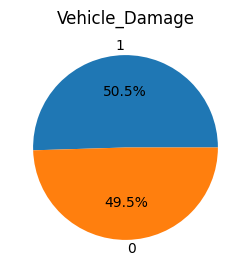

--------------------------------------------------------------------------------
feature :- Policy_Sales_Channel
No of unique value :- 155
No of value count :-
 152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64


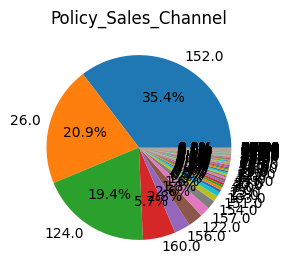

--------------------------------------------------------------------------------
feature :- Vintage
No of unique value :- 290
No of value count :-
 256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64


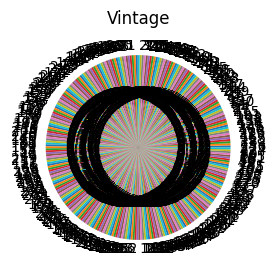

--------------------------------------------------------------------------------
feature :- Response
No of unique value :- 2
No of value count :-
 0    334399
1     46710
Name: Response, dtype: int64


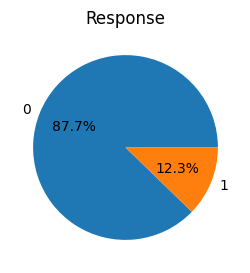

--------------------------------------------------------------------------------


In [ ]:
# Check Unique Values for each variable.


for i in df.columns:
  if i not in ['id','Annual_Premium']:
    print( 'feature :-', i )
    print('No of unique value :-',df[i].nunique())
    print('No of value count :-\n',df[i].value_counts())
    labels=df[i].value_counts().index

    #visualize above data
    plt.figure(figsize=(3,3))
    plt.pie(df[i].value_counts(),labels=labels, autopct='%1.1f%%')
    plt.title(i)
    plt.show()
    print('--'*40)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Mention all code with chart wise. see below

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Age vs Response from Customers

In [ ]:
# Chart - 1 Numerical Data-Age vs Response from Customers

# Top 20 Age of Customers that Response Positively.
most_responding=df.groupby('Age')['Response'].value_counts().unstack().sort_values(by=df['Response'][2],ascending=False)[:20]
most_responding.rename(columns={0:'No',1:'Yes'},inplace=True)
print(most_responding)
print('--'*20)

# Top 20 Age of Customers that Response Negatively.
most_not_responding=df.groupby('Age')['Response'].value_counts().unstack().sort_values(by=df['Response'][1],ascending=False)[:20]
most_not_responding.rename(columns={0:'No',1:'Yes'},inplace=True)
print(most_not_responding)


Response      No     Yes
Age                     
44        6546.0  1811.0
43        6632.0  1805.0
45        6408.0  1775.0
46        6172.0  1707.0
42        6356.0  1651.0
41        6121.0  1615.0
47        5744.0  1607.0
40        5618.0  1550.0
48        5613.0  1500.0
39        5085.0  1375.0
38        4405.0  1305.0
49        5317.0  1298.0
50        5007.0  1256.0
37        4255.0  1153.0
36        3914.0  1152.0
51        4796.0  1119.0
35        3824.0  1112.0
33        3925.0  1085.0
34        3818.0  1077.0
52        4550.0  1040.0
----------------------------------------
Response       No     Yes
Age                      
24        25047.0   913.0
23        23364.0   892.0
22        20201.0   763.0
25        19902.0   734.0
21        15883.0   574.0
26        13051.0   484.0
27        10289.0   471.0
28         8357.0   617.0
29         6674.0   755.0
43         6632.0  1805.0
44         6546.0  1811.0
45         6408.0  1775.0
42         6356.0  1651.0
46         6172.0  

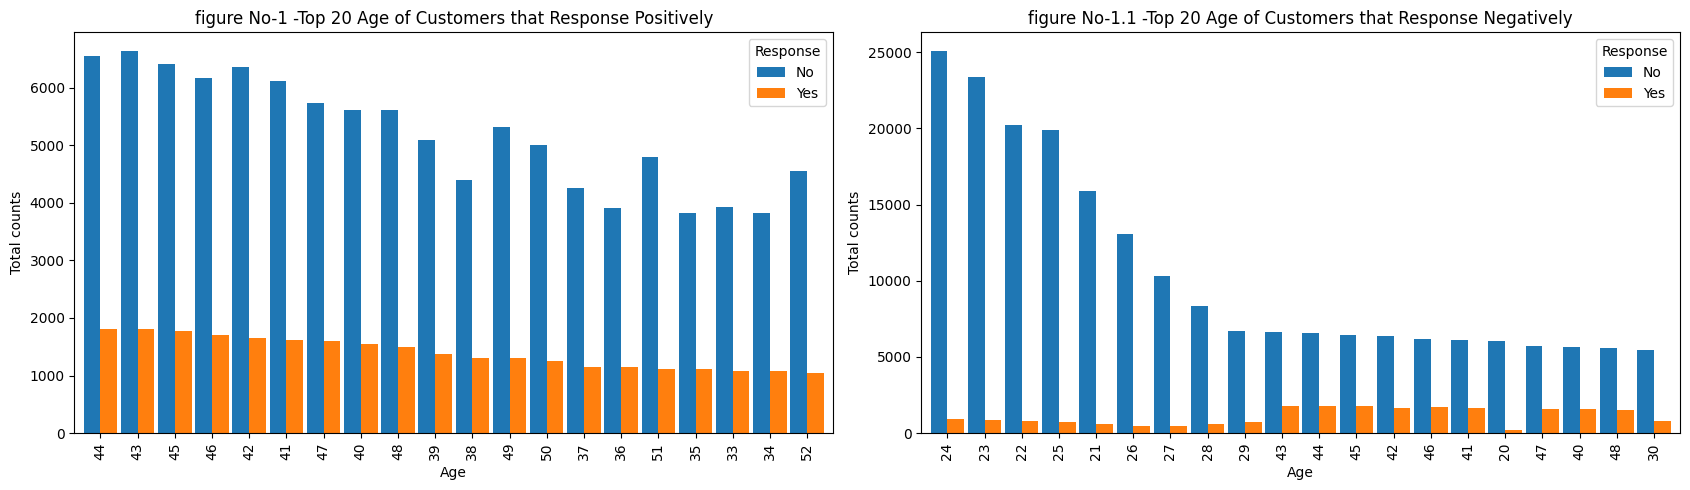

In [ ]:
# Chart - 1 visualization code-Age vs Response from Customers

fig, axs = plt.subplots(1,2,figsize=(17,5))
#Top 20 Age of Customers that Response Positively.
most_responding.plot(kind='bar',width=0.9, ax=axs[0])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Total counts')
axs[0].set_title('figure No-1 -Top 20 Age of Customers that Response Positively')


# Top 20 Age of Customers that Response Negatively.
most_not_responding.plot(kind='bar',width=0.9, ax=axs[1])
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Total counts')
axs[1].set_title('figure No-1.1 -Top 20 Age of Customers that Response Negatively')

plt.tight_layout()  # Optional, to improve spacing between subplots
plt.show()

##### 1. Why did you pick the specific chart?

* It is showing easily each data to present anythings.

##### 2. What is/are the insight(s) found from the chart?

* Most responsive customer has age 44 and above above 33 age
* Most Not responding customers has age 24
* The Percent of customers responding positively is very less as compare to health insurance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* There is lots of customers who has taken Health insurance but not Taking vehicle insurance So need to do advertisement and explain customers how it is different than other.

#### Chart - 2-Gender Wise Customers Response

In [ ]:
# Chart - 2 Numerical data-Gender Wise Customers Response

# Gender wise customers response
a=df.groupby('Gender')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Female',1:'Male'},inplace=True)
print(a)


Response      No    Yes
Gender                 
Female    156835  18185
Male      177564  28525


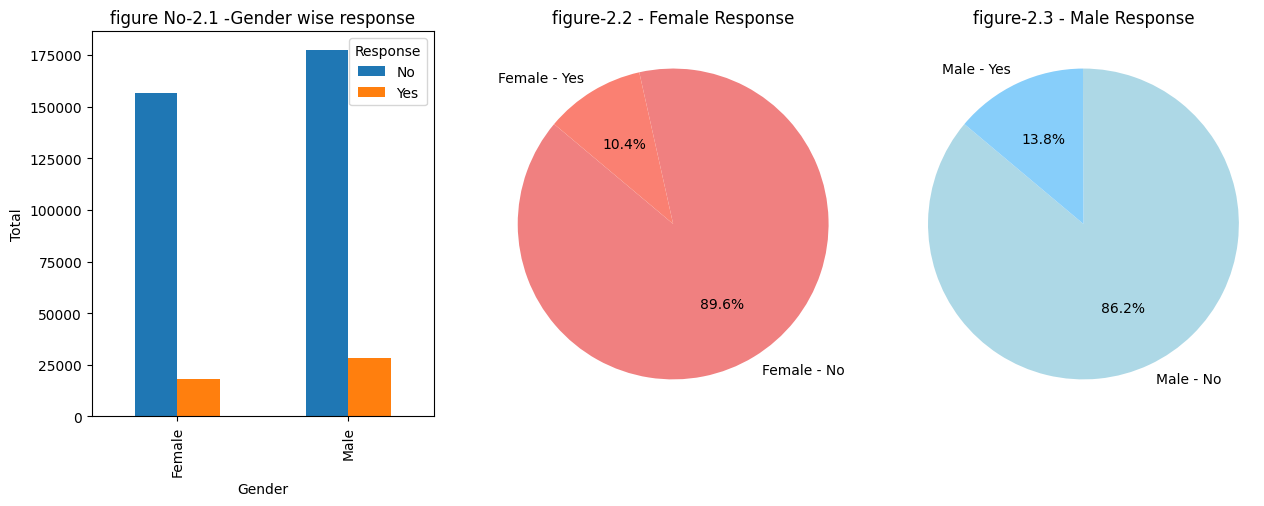

In [ ]:

# Chart - 2 visualization code-Gender Wise Customers Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-2.1 -Gender wise response')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
gender_counts_female = [156835, 18185]
categories_female = ['Female - No', 'Female - Yes']
gender_counts_male = [177564, 28525]
categories_male = ['Male - No', 'Male - Yes']

# Plotting the pie chart

axs[1].pie(gender_counts_female, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-2.2 - Female Response')

axs[2].pie(gender_counts_male, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-2.3 - Male Response')
axs[2].axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

* To compare to active consumers and their response for new service.

##### 2. What is/are the insight(s) found from the chart?

* From above figure it's easy showing that Male are Responding Good as compare to Female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Its chance to increase Vehicle insurance in future.
* Here is only 10.4% Female and 13.8% male are responding us so need to contact with other.

#### Chart - 3-Driving_License vs Response

In [ ]:
# Chart - 3 Numerical code-Driving_License vs Response

# Driving_License wise customers response
a=df.groupby('Driving_License')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Not_Available',1:'Available'},inplace=True)
print(a)


Response             No    Yes
Driving_License               
Not_Available       771     41
Available        333628  46669


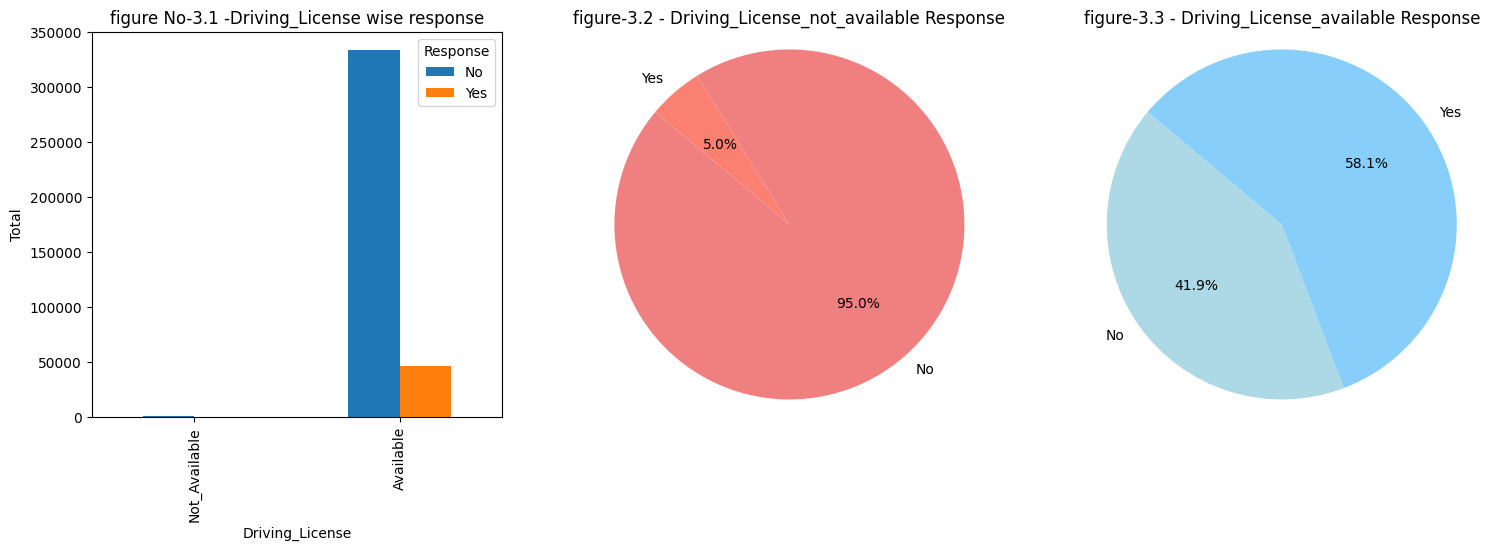

In [ ]:
# Chart - 3 visualization -Driving_License vs Response

fig,axs=plt.subplots(1,3,figsize=(18,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-3.1 -Driving_License wise response')
axs[0].set_xlabel('Driving_License')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
Driving_License_not_available = [771,41]
categories_female = ['No', 'Yes']
Driving_License_available = [33628 , 46669]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(Driving_License_not_available, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-3.2 - Driving_License_not_available Response')

axs[2].pie(Driving_License_available, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-3.3 - Driving_License_available Response')
axs[2].axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

* To compare easily.

##### 2. What is/are the insight(s) found from the chart?

* Driving license not availble has very low response as compare to available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* We have to Focus on driving licence available customers.

#### Chart - 4- Previously_Insured vs Response

In [ ]:
# Chart - 4 - Numerical Data - Previously_Insured vs Response

# Previously_Insured wise customers response
a=df.groupby('Previously_Insured')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Not_Previously_Insured',1:'Previously_Insured'},inplace=True)
print(a)



Response                    No    Yes
Previously_Insured                   
Not_Previously_Insured  159929  46552
Previously_Insured      174470    158


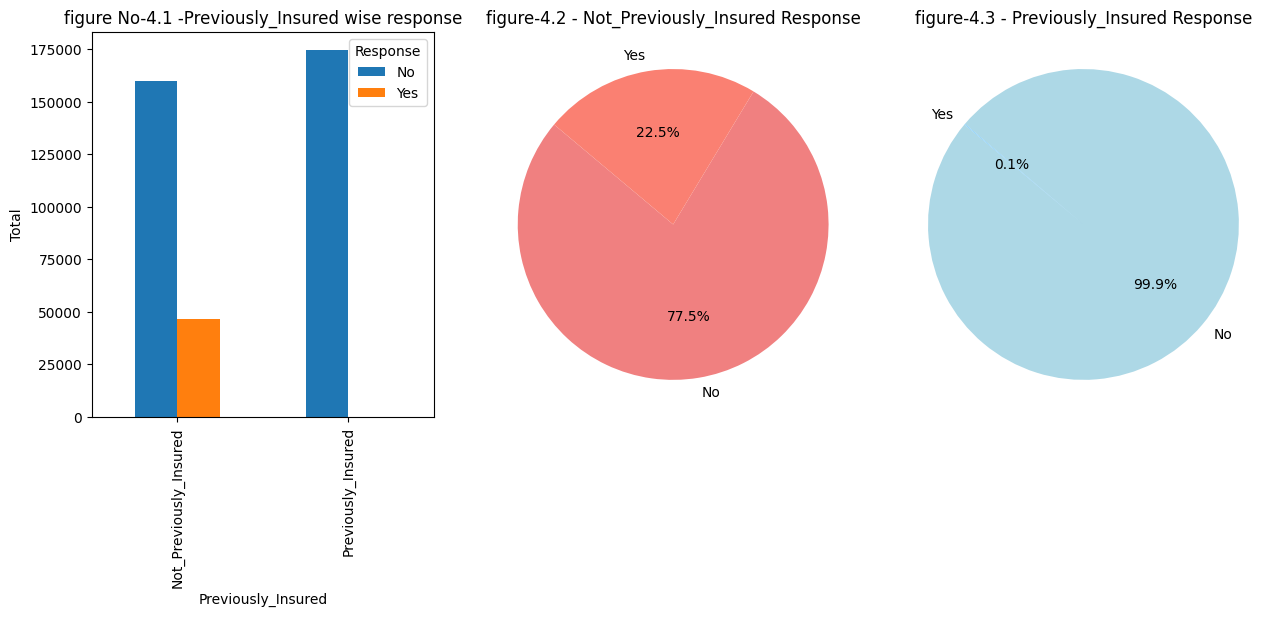

In [ ]:
# Chart - 4 visualization code-Previously_Insured vs Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-4.1 -Previously_Insured wise response')
axs[0].set_xlabel('Previously_Insured')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
Not_Previously_Insured = [159929 , 46552]
categories_female = ['No', 'Yes']
Previously_Insured = [ 174470   , 158]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(Not_Previously_Insured, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-4.2 - Not_Previously_Insured Response')

axs[2].pie(Previously_Insured, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-4.3 - Previously_Insured Response')
axs[2].axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

* To visualize data easily.

##### 2. What is/are the insight(s) found from the chart?

* Here not_Previously_Insured  customers are giving positive response  than Previously insured vehicle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Previously_Insured  has very low response 0.1% as compare to Not insured 22.5%

#### Chart - 5 -Vehicle_Damage vs Response

In [ ]:
# Chart -5-numerical data -Vehicle_Damage vs Response

# Vehicle_Damage wise customers response
a=df.groupby('Vehicle_Damage')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'No_Vehicle_Damage',1:'Vehicle_Damage'},inplace=True)
print(a)

Response               No    Yes
Vehicle_Damage                  
No_Vehicle_Damage  187714    982
Vehicle_Damage     146685  45728


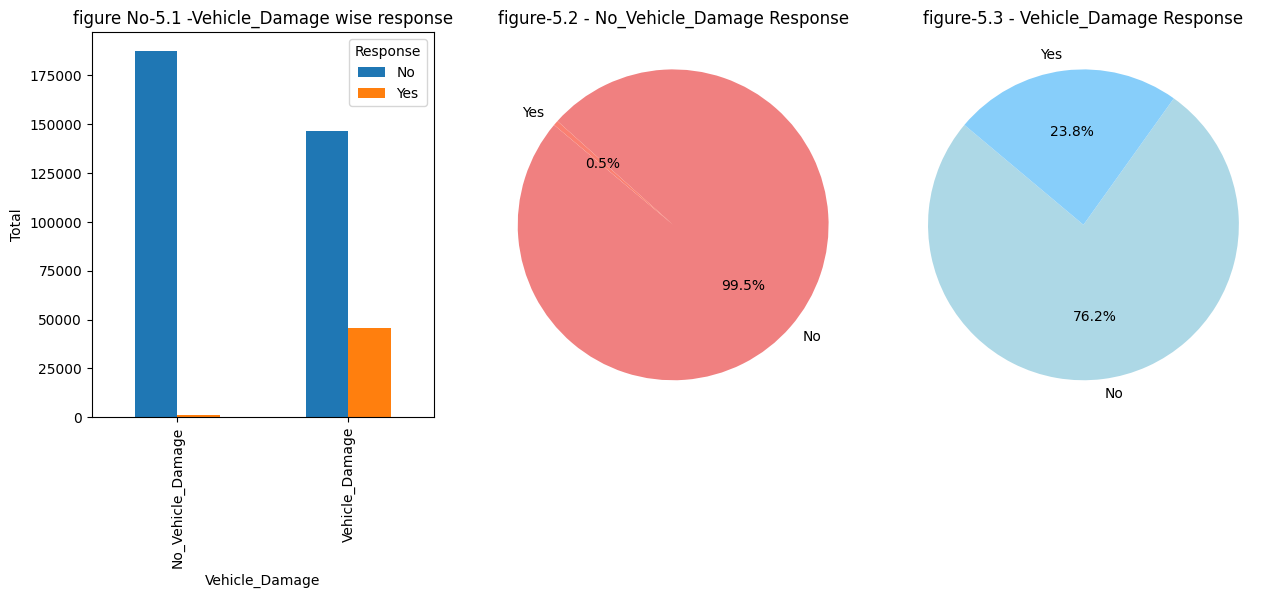

In [ ]:
# Chart - 5 visualization -Vehicle_Damage vs Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-5.1 -Vehicle_Damage wise response')
axs[0].set_xlabel('Vehicle_Damage')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
No_Vehicle_Damage = [187714  ,  982]
categories_female = ['No', 'Yes']
Vehicle_Damage = [ 146685 , 45728]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(No_Vehicle_Damage, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-5.2 - No_Vehicle_Damage Response')

axs[2].pie(Vehicle_Damage, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-5.3 - Vehicle_Damage Response')
axs[2].axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

* Easy to understand.

##### 2. What is/are the insight(s) found from the chart?

* Here very vehicle not damage is giving response 0.5% as compare to damage 23.8%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Damage vehicle are more responding as compare to Not Damage vehicle.

#### Chart - 6

In [ ]:
# Chart - 6 - Region_Code vs Response

#To check responed from customers
print('check responed from customers')
a=df.groupby('Region_Code')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},inplace=True)
print(a[:10])
print('--'*20)
# To check pertage of positive respond from region wise.
a['perc_positive_respond']=round((a['Yes']/(a['No']+a['Yes']))*100,2)

# Top 10 region have given positive respond
print('top 10 responding region')
b=a['perc_positive_respond'].sort_values(ascending=False).head(10)
print(b)
print('--'*20)
# top 10 not responding region
print('top 10 not responding region')
c=a['perc_positive_respond'].sort_values(ascending=True).head(10)
print(c)
print('--'*20)

check responed from customers
Response        No   Yes
Region_Code             
0.0           1847   174
1.0            899   109
2.0           3751   287
3.0           8070  1181
4.0           1516   285
5.0           1131   148
6.0           5841   439
7.0           2847   432
8.0          30620  3257
9.0           2848   253
10.0          4111   263
----------------------------------------
top 10 responding region
Region_Code
38.0    19.20
28.0    18.72
19.0    16.29
4.0     15.82
23.0    15.31
51.0    15.30
24.0    14.16
7.0     13.17
18.0    13.16
3.0     12.77
Name: perc_positive_respond, dtype: float64
----------------------------------------
top 10 not responding region
Region_Code
44.0    4.08
25.0    4.27
10.0    6.01
50.0    6.27
22.0    6.34
16.0    6.68
6.0     6.99
17.0    7.03
21.0    7.10
2.0     7.11
Name: perc_positive_respond, dtype: float64
----------------------------------------


<Figure size 500x500 with 0 Axes>

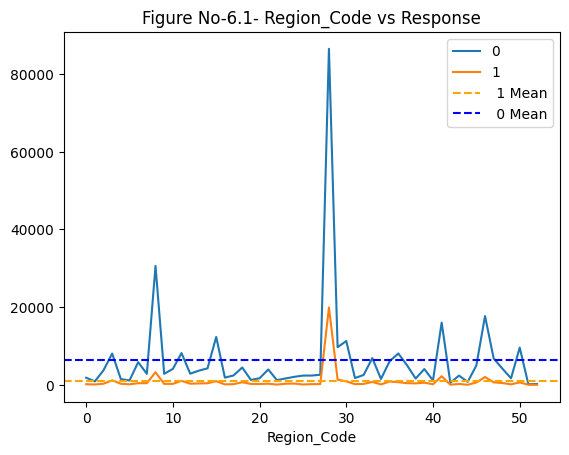

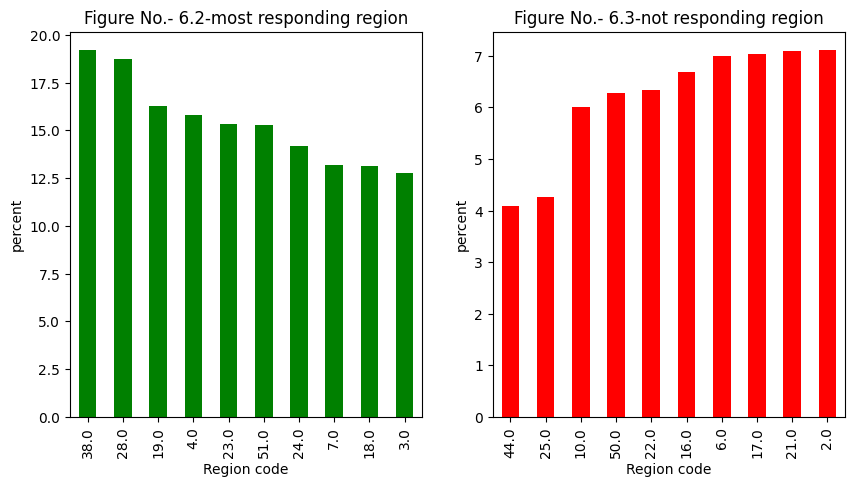

In [ ]:
# Chart - 6 visualization code -Region_Code vs Response

ax=plt.figure(figsize=(5,5))
df.groupby('Region_Code')['Response'].value_counts().unstack().plot(kind='line')
plt.axhline((df.groupby('Region_Code')['Response'].value_counts().unstack())[1].mean(),linestyle='dashed',color='orange',label=' 1 Mean')
plt.axhline((df.groupby('Region_Code')['Response'].value_counts().unstack())[0].mean(),linestyle='dashed',color='blue',label=' 0 Mean')
plt.legend()
plt.title('Figure No-6.1- Region_Code vs Response')
plt.show()

# top 10 responding region
fig,axs=plt.subplots(1,2,figsize=(10,5))


a['perc_positive_respond'].sort_values(ascending=False).head(10).plot(kind='bar', ax=axs[0] ,color='green')
axs[0].set_title('Figure No.- 6.2-most responding region')
axs[0].set_xlabel('Region code')
axs[0].set_ylabel('percent')

# top 10 not responding region
a['perc_positive_respond'].sort_values(ascending=True).head(10).plot(kind='bar' , ax=axs[1],color='red')
axs[1].set_title('Figure No.- 6.3-not responding region')
axs[1].set_xlabel('Region code')
axs[1].set_ylabel('percent')
plt.show()



##### 1. Why did you pick the specific chart?

* To visualize easily.

##### 2. What is/are the insight(s) found from the chart?

* Region 38 has given most respond positively appro. 19% and region 44 has lowest responsed appro. 4 %.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Need to do advertisement to increase subscription.

#### Chart - 7

In [ ]:
# Chart - 7 Numerical data Response vs Vehicle_Age
print('No of vehicle in diff category')
a=df['Vehicle_Age'].value_counts()
print(a)
print('--'*20)

# To check Response by age of vehicle and percentage of positive response too
b=df.groupby('Vehicle_Age')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
b['percentage']=round((b['Yes']/a)*100,2)
print('To check % of positive response by vehicle age')
b

No of vehicle in diff category
1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64
----------------------------------------
To check % of positive response by vehicle age


Response         No    Yes  percentage
Vehicle_Age                           
0            157584   7202        4.37
1            165510  34806       17.38
2             11305   4702       29.37

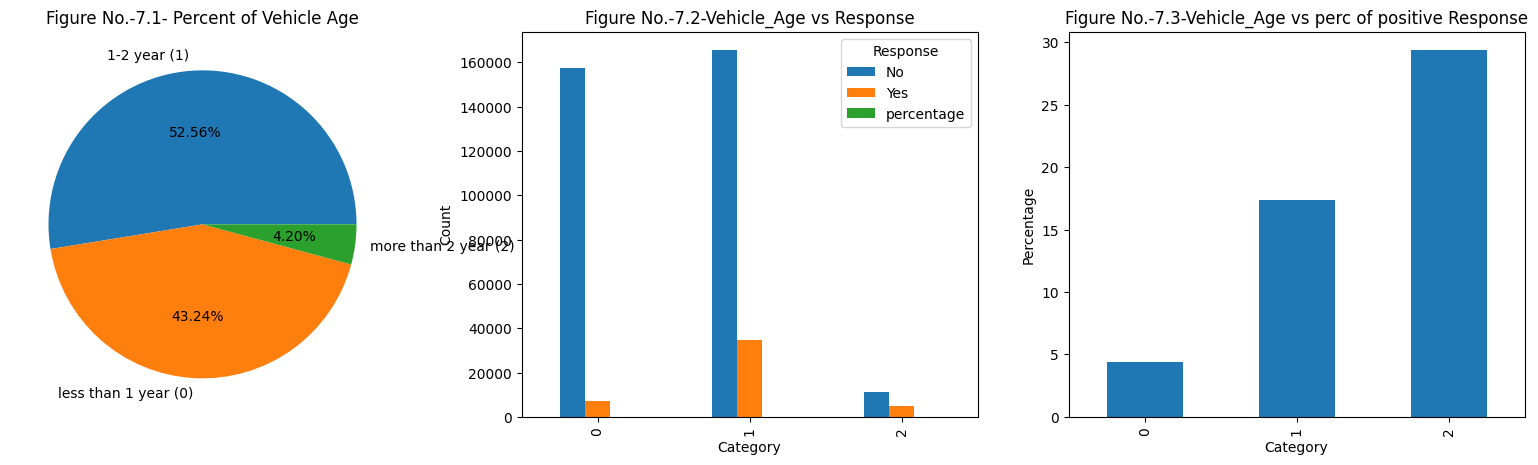

In [ ]:
# Chart - 7 visualization code - Response vs Vehicle_Age
#Percent of vehicle Age
fig,axs=plt.subplots(1,3,figsize=(20,5))
labels=['1-2 year (1)','less than 1 year (0)','more than 2 year (2)']
axs[0].pie(a,labels=labels,autopct='%.2f%%')
axs[0].set_title('Figure No.-7.1- Percent of Vehicle Age')


#Check Response by Vehicle Age category and its percent
b.plot(kind='bar',ax=axs[1])
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Category')
axs[1].set_title('Figure No.-7.2-Vehicle_Age vs Response')


b['percentage'].plot(kind='bar',ax=axs[2])

axs[2].set_ylabel('Percentage')
axs[2].set_xlabel('Category')
axs[2].set_title('Figure No.-7.3-Vehicle_Age vs perc of positive Response')
plt.show()


##### 1. Why did you pick the specific chart?

* To better understand what customer want.

##### 2. What is/are the insight(s) found from the chart?

* Vehicle age more than 2 year has less Register but Has shown More Positive responsed appr. 29 %.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes

#### Chart - 8 - Annual_Premium vs Response

In [ ]:
#chart-9- Annual_Premium vs Response numerical data
print('Annual_Premium vs Response')
a=df.groupby('Annual_Premium')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
print(a)
print('--'*20)
# To Check % response
print('To check %')
a['percetage'] = round((a['Yes']/(a['No']+a['Yes']))*100,2)
print(a)

Annual_Premium vs Response
Response            No    Yes
Annual_Premium               
0                89142  11821
1               217952  29990
2                24511   4404
3                 2139    372
4                  565    101
5                   48     13
6                   33      5
7                    5      3
8                    4      1
----------------------------------------
To check %
Response            No    Yes  percetage
Annual_Premium                          
0                89142  11821      11.71
1               217952  29990      12.10
2                24511   4404      15.23
3                 2139    372      14.81
4                  565    101      15.17
5                   48     13      21.31
6                   33      5      13.16
7                    5      3      37.50
8                    4      1      20.00


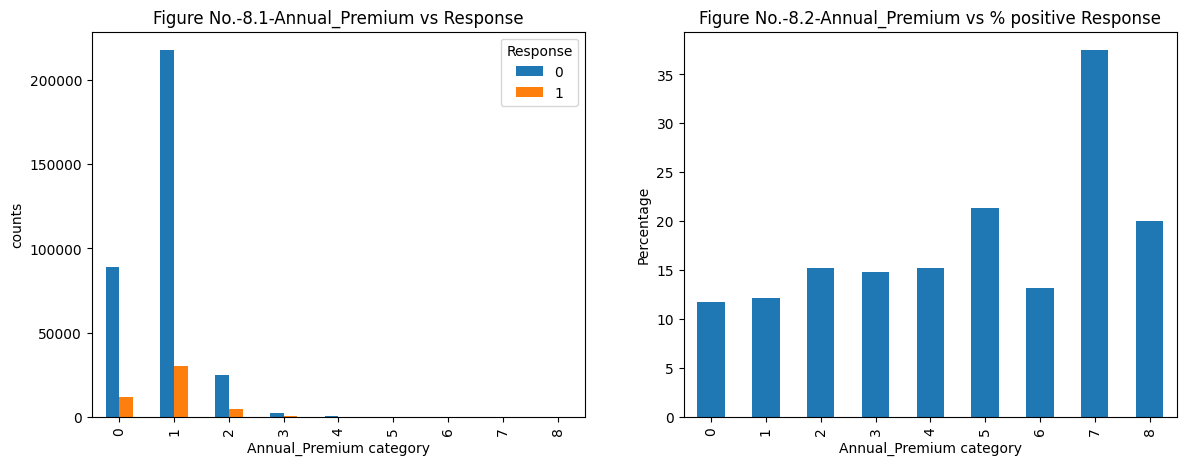

In [ ]:
# Chart - 8 visualization code

#Annual_Premium vs Response

fig,axs=plt.subplots(1,2,figsize=(14,5))
df.groupby('Annual_Premium')['Response'].value_counts().unstack().plot(kind='bar',ax=axs[0])
axs[0].set_title('Figure No.-8.1-Annual_Premium vs Response')
axs[0].set_xlabel('Annual_Premium category')
axs[0].set_ylabel('counts')


# To check %
a['percetage'].plot(kind='bar',ax=axs[1])
axs[1].set_title('Figure No.-8.2-Annual_Premium vs % positive Response')
axs[1].set_xlabel('Annual_Premium category')
axs[1].set_ylabel('Percentage')
plt.show()

##### 1. Why did you pick the specific chart?

* To easily visualize data.

##### 2. What is/are the insight(s) found from the chart?

* There are lots of customers come in category 1 ie. 25000 < annual premium <=50000 but positive responding appr. 12%.
* There is very low amount of customer of category 7 but getting positive response 37 %


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* There is lots of customers of category 0,1,2,3 so it is important to focus on them to increase sales.

#### Chart - 9-Policy_Sales_Channel vs Response

In [ ]:
# Chart -9- Policy_Sales_Channel vs Response

print('Policy_Sales_Channel vs Response')
a=df.groupby('Policy_Sales_Channel')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
print(a)
print('--'*20)

# % active response
print('% active response')
a['percentage']=round(a['Yes']/(a['No']+a['Yes'])*100,2)
print(a)
print('--'*20)

Policy_Sales_Channel vs Response
Response                   No     Yes
Policy_Sales_Channel                 
1.0                    1039.0    35.0
2.0                       3.0     1.0
3.0                     364.0   159.0
4.0                     407.0   102.0
6.0                       3.0     NaN
...                       ...     ...
157.0                  4890.0  1794.0
158.0                   357.0   135.0
159.0                    50.0     1.0
160.0                 21304.0   475.0
163.0                  2013.0   880.0

[155 rows x 2 columns]
----------------------------------------
% active response
Response                   No     Yes  percentage
Policy_Sales_Channel                             
1.0                    1039.0    35.0        3.26
2.0                       3.0     1.0       25.00
3.0                     364.0   159.0       30.40
4.0                     407.0   102.0       20.04
6.0                       3.0     NaN         NaN
...                       ...     ...   

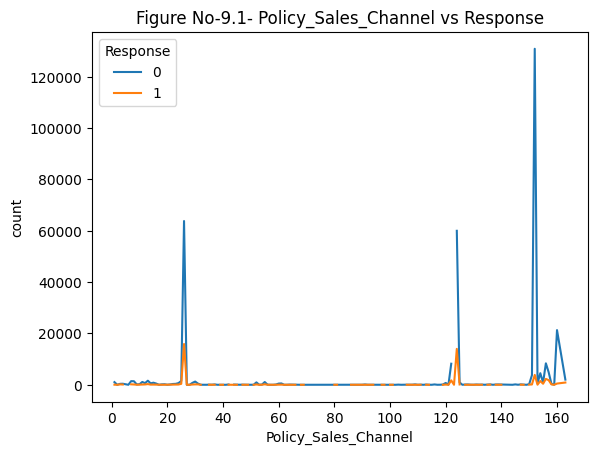

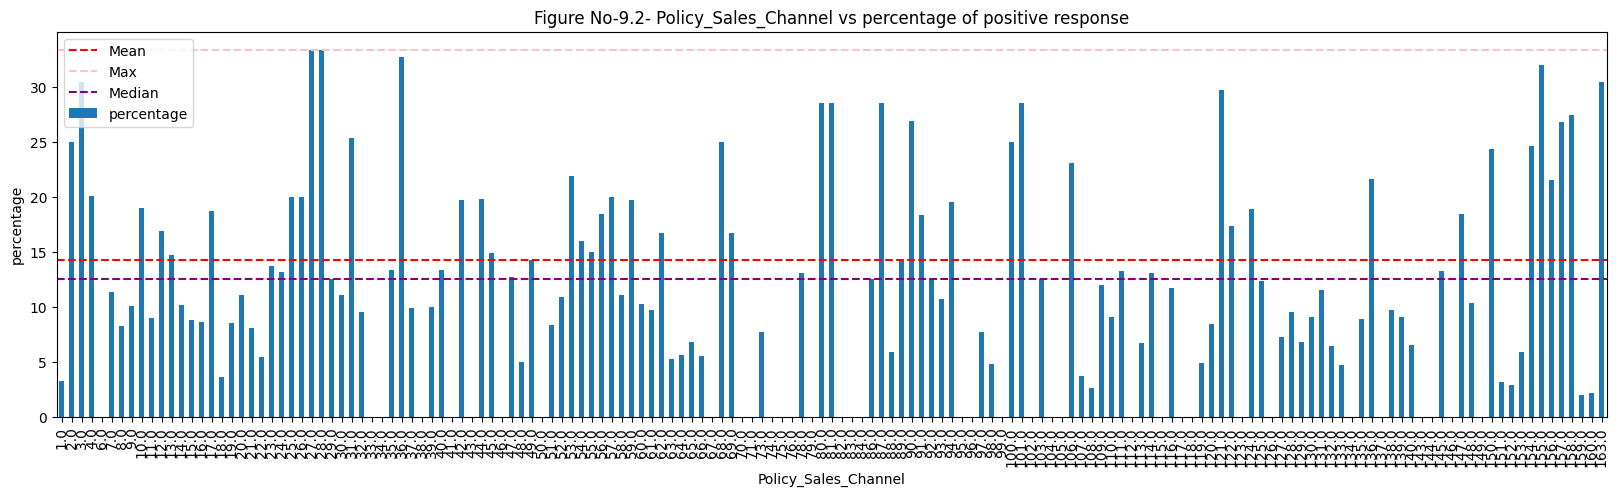

In [ ]:
# Chart - 9 visualization code - Policy_Sales_Channel vs Response
#Policy_Sales_Channel vs Response
df.groupby('Policy_Sales_Channel')['Response'].value_counts().unstack().plot(kind='line')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('count')
plt.title('Figure No-9.1- Policy_Sales_Channel vs Response')
plt.show()

# To see % positive response
plt.figure(figsize=(20,5))
a['percentage'].plot(kind='bar')
plt.axhline(a['percentage'].mean(),color='red',label='Mean',linestyle='dashed')
plt.axhline(a['percentage'].max(),color='pink',label='Max',linestyle='dashed')
plt.axhline(a['percentage'].median(),color='purple',label='Median',linestyle='dashed')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('percentage')
plt.title('Figure No-9.2- Policy_Sales_Channel vs percentage of positive response')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

* To check data.

##### 2. What is/are the insight(s) found from the chart?

* Policy sales channel no 27 and 28 has given more positive response as compare to other.
* Some channel have given zero response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* yes

#### Chart - 10 - Vintage vs Response

In [ ]:
# Chart - 10 -Numerical data for Vintage vs Response
print('Vintage vs Response')
a=df.groupby('Vintage')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
print(a)
print('--'*20)
print('% positive response')
a['percent']=round((a['Yes']/(a['Yes']+a['No']))*100,2)
print(a)


Vintage vs Response
Response    No  Yes
Vintage            
10        1164  147
11        1153  191
12        1092  165
13        1145  184
14        1104  156
...        ...  ...
295       1118  157
296       1146  156
297       1142  142
298       1198  186
299       1114  169

[290 rows x 2 columns]
----------------------------------------
% positive response
Response    No  Yes  percent
Vintage                     
10        1164  147    11.21
11        1153  191    14.21
12        1092  165    13.13
13        1145  184    13.84
14        1104  156    12.38
...        ...  ...      ...
295       1118  157    12.31
296       1146  156    11.98
297       1142  142    11.06
298       1198  186    13.44
299       1114  169    13.17

[290 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

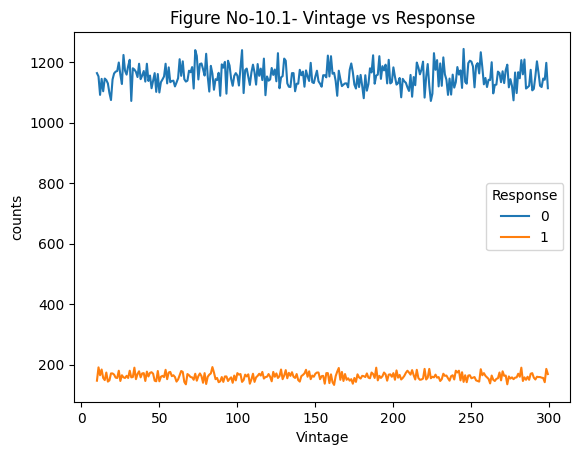

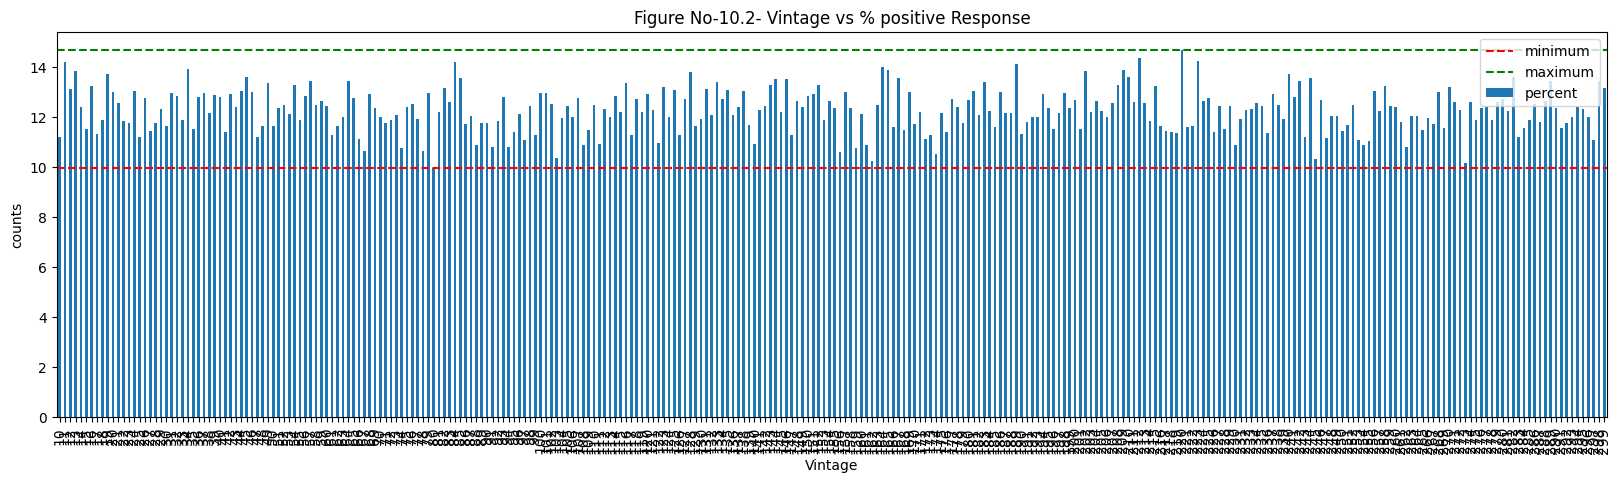

In [ ]:
# Chart - 10 visualization code - Vintage vs Response
#Vintage vs Response

plt.figure(figsize=(15,5))
df.groupby('Vintage')['Response'].value_counts().unstack().plot(kind='line')
plt.title('Figure No-10.1- Vintage vs Response')
plt.xlabel('Vintage')
plt.ylabel('counts')
plt.show()

# To check % positive response
plt.figure(figsize=(20,5))
a['percent'].plot(kind='bar')
plt.axhline(a['percent'].min(),color='red',linestyle='dashed',label='minimum')
plt.axhline(a['percent'].max(),color='green',linestyle='dashed',label='maximum')
plt.title('Figure No-10.2- Vintage vs % positive Response')
plt.xlabel('Vintage')
plt.ylabel('counts')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

* To easily visualize above numerical data.

##### 2. What is/are the insight(s) found from the chart?

* Percent of positive response from 9% to max 15 percent

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes,Every category of customer has showing 10-15 % positive response.

#### Chart - 11 - scatter plot and box plot

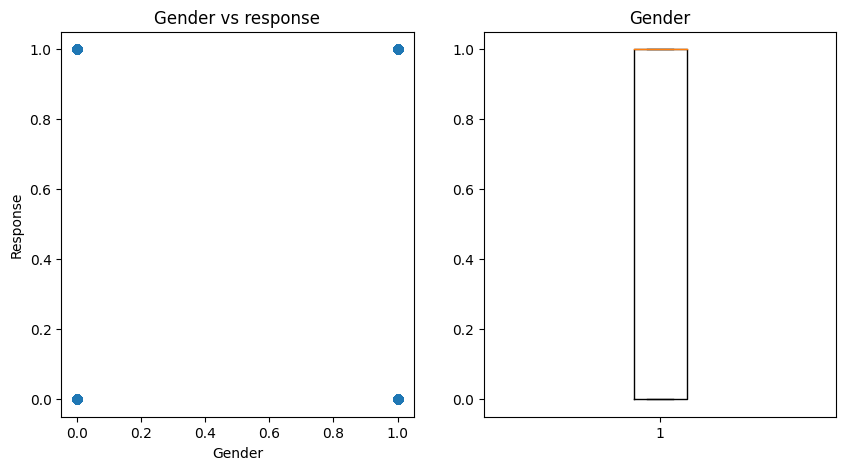

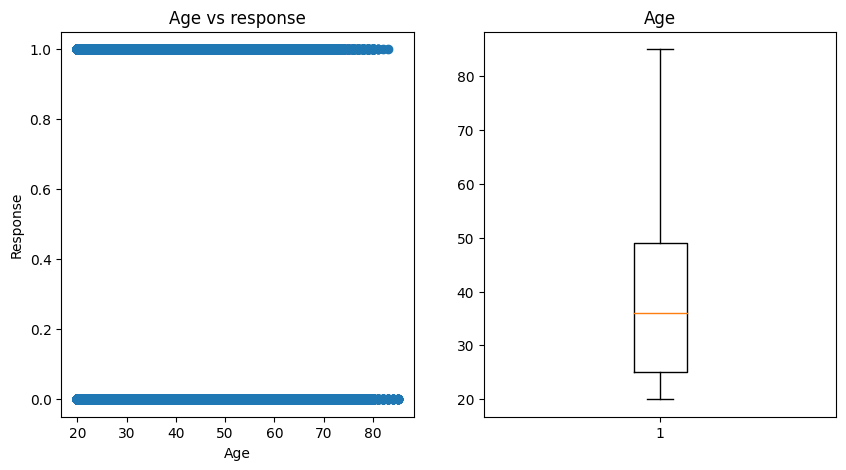

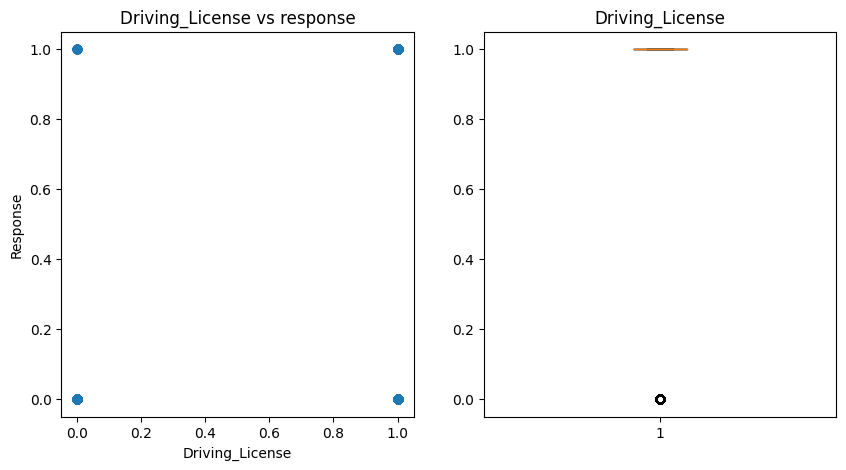

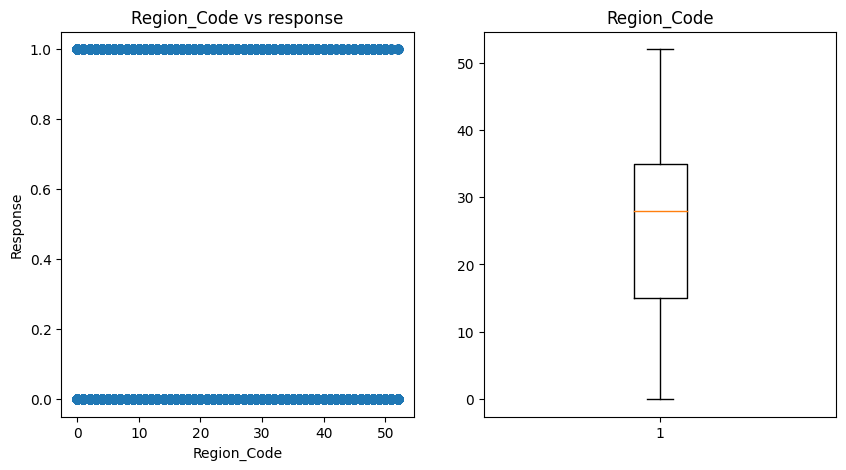

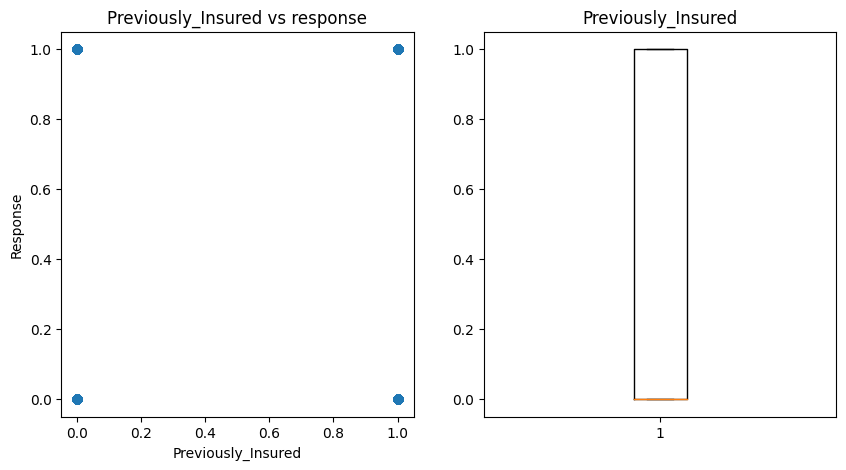

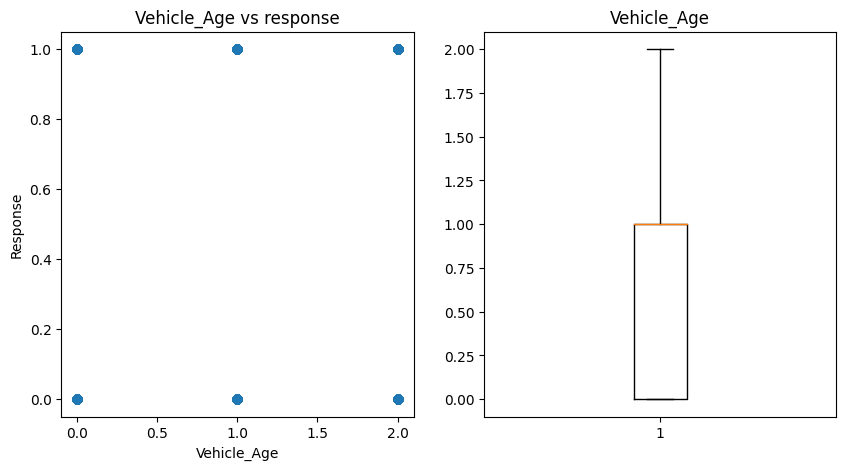

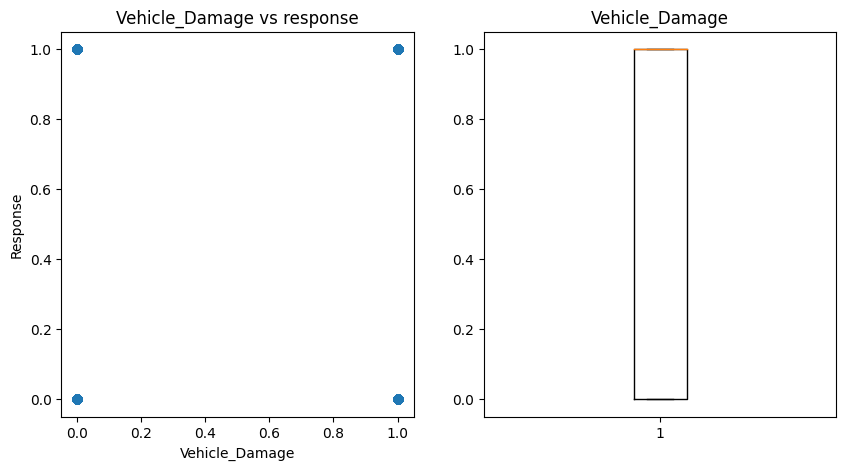

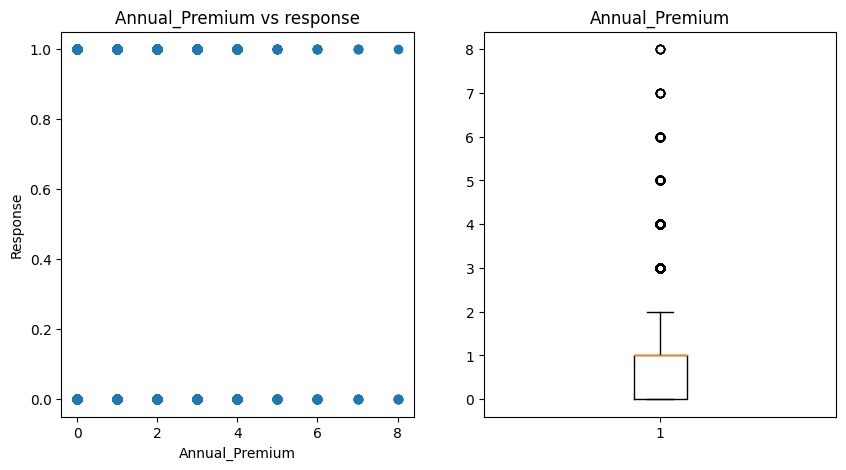

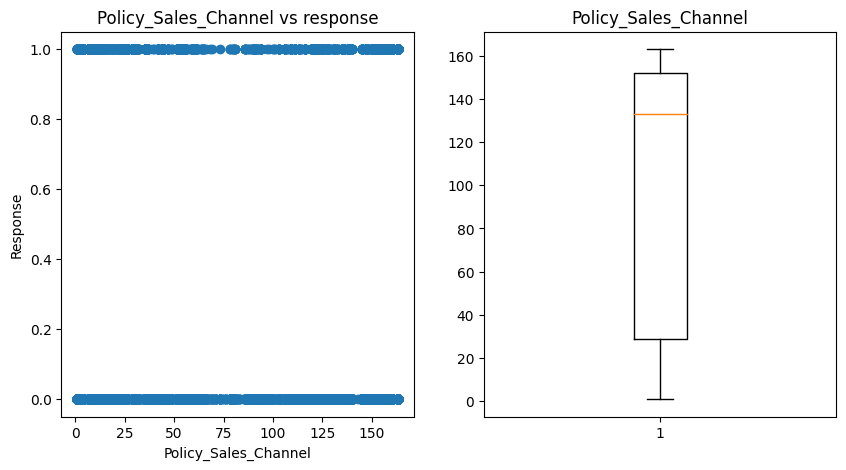

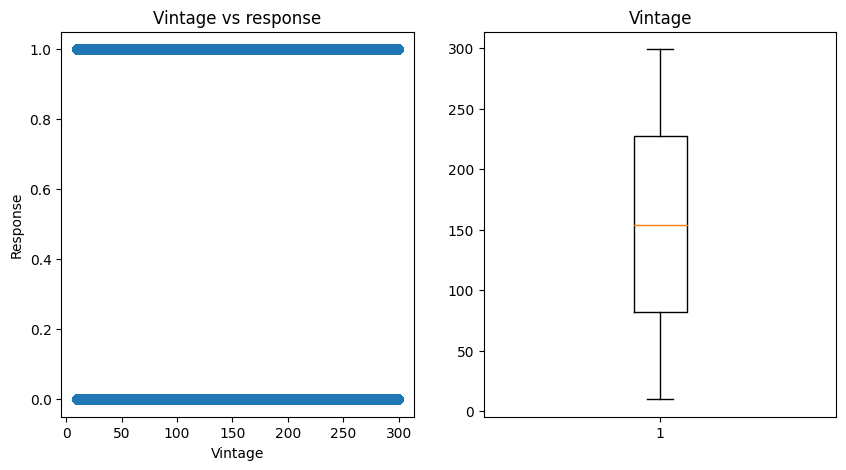

In [ ]:
# Chart - 11 visualization code

for i in df.columns:
  if i != 'Response':
    fig,axs=plt.subplots(1,2,figsize=(10,5))
    axs[0].scatter(df[i],df['Response'])
    axs[0].set_title(i + " vs response")
    axs[0].set_xlabel(i)
    axs[0].set_ylabel('Response')


    axs[1].boxplot(df[i])
    axs[1].set_title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

* To see distribution.

##### 2. What is/are the insight(s) found from the chart?

* Only annual premium has outlier in data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 12 - Correlation Heatmap

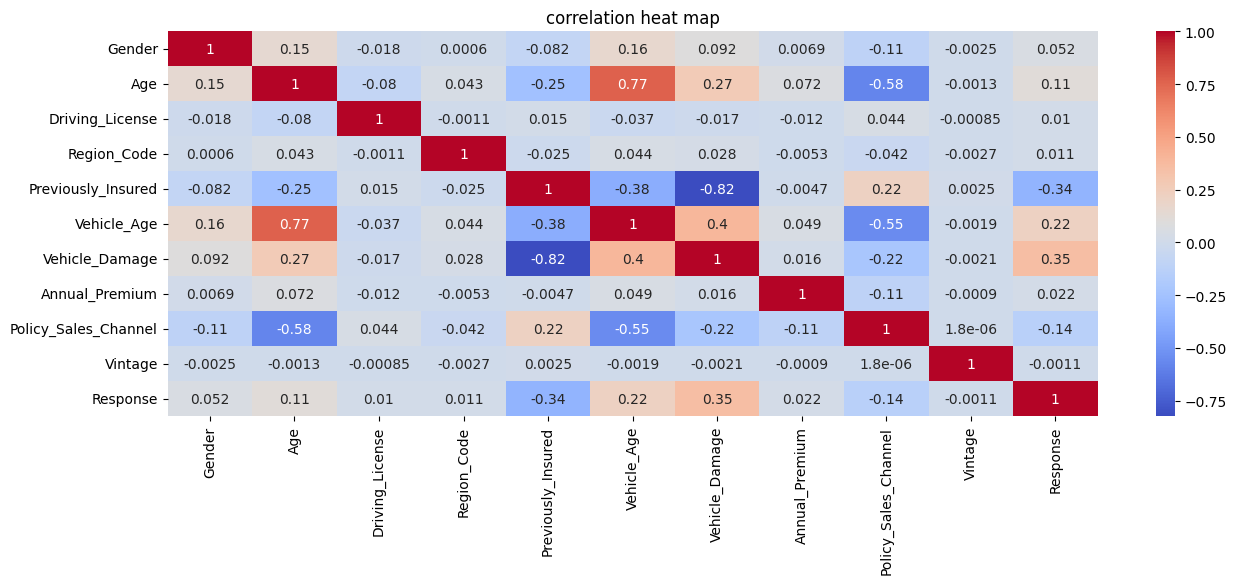

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('correlation heat map')
plt.show()

##### 1. Why did you pick the specific chart?

* To visualize correlation easily.

##### 2. What is/are the insight(s) found from the chart?

* From above graph we got information no one variable are more correlated to each other except 'age' and vehicle age.

#### Chart - 13 - Pair Plot

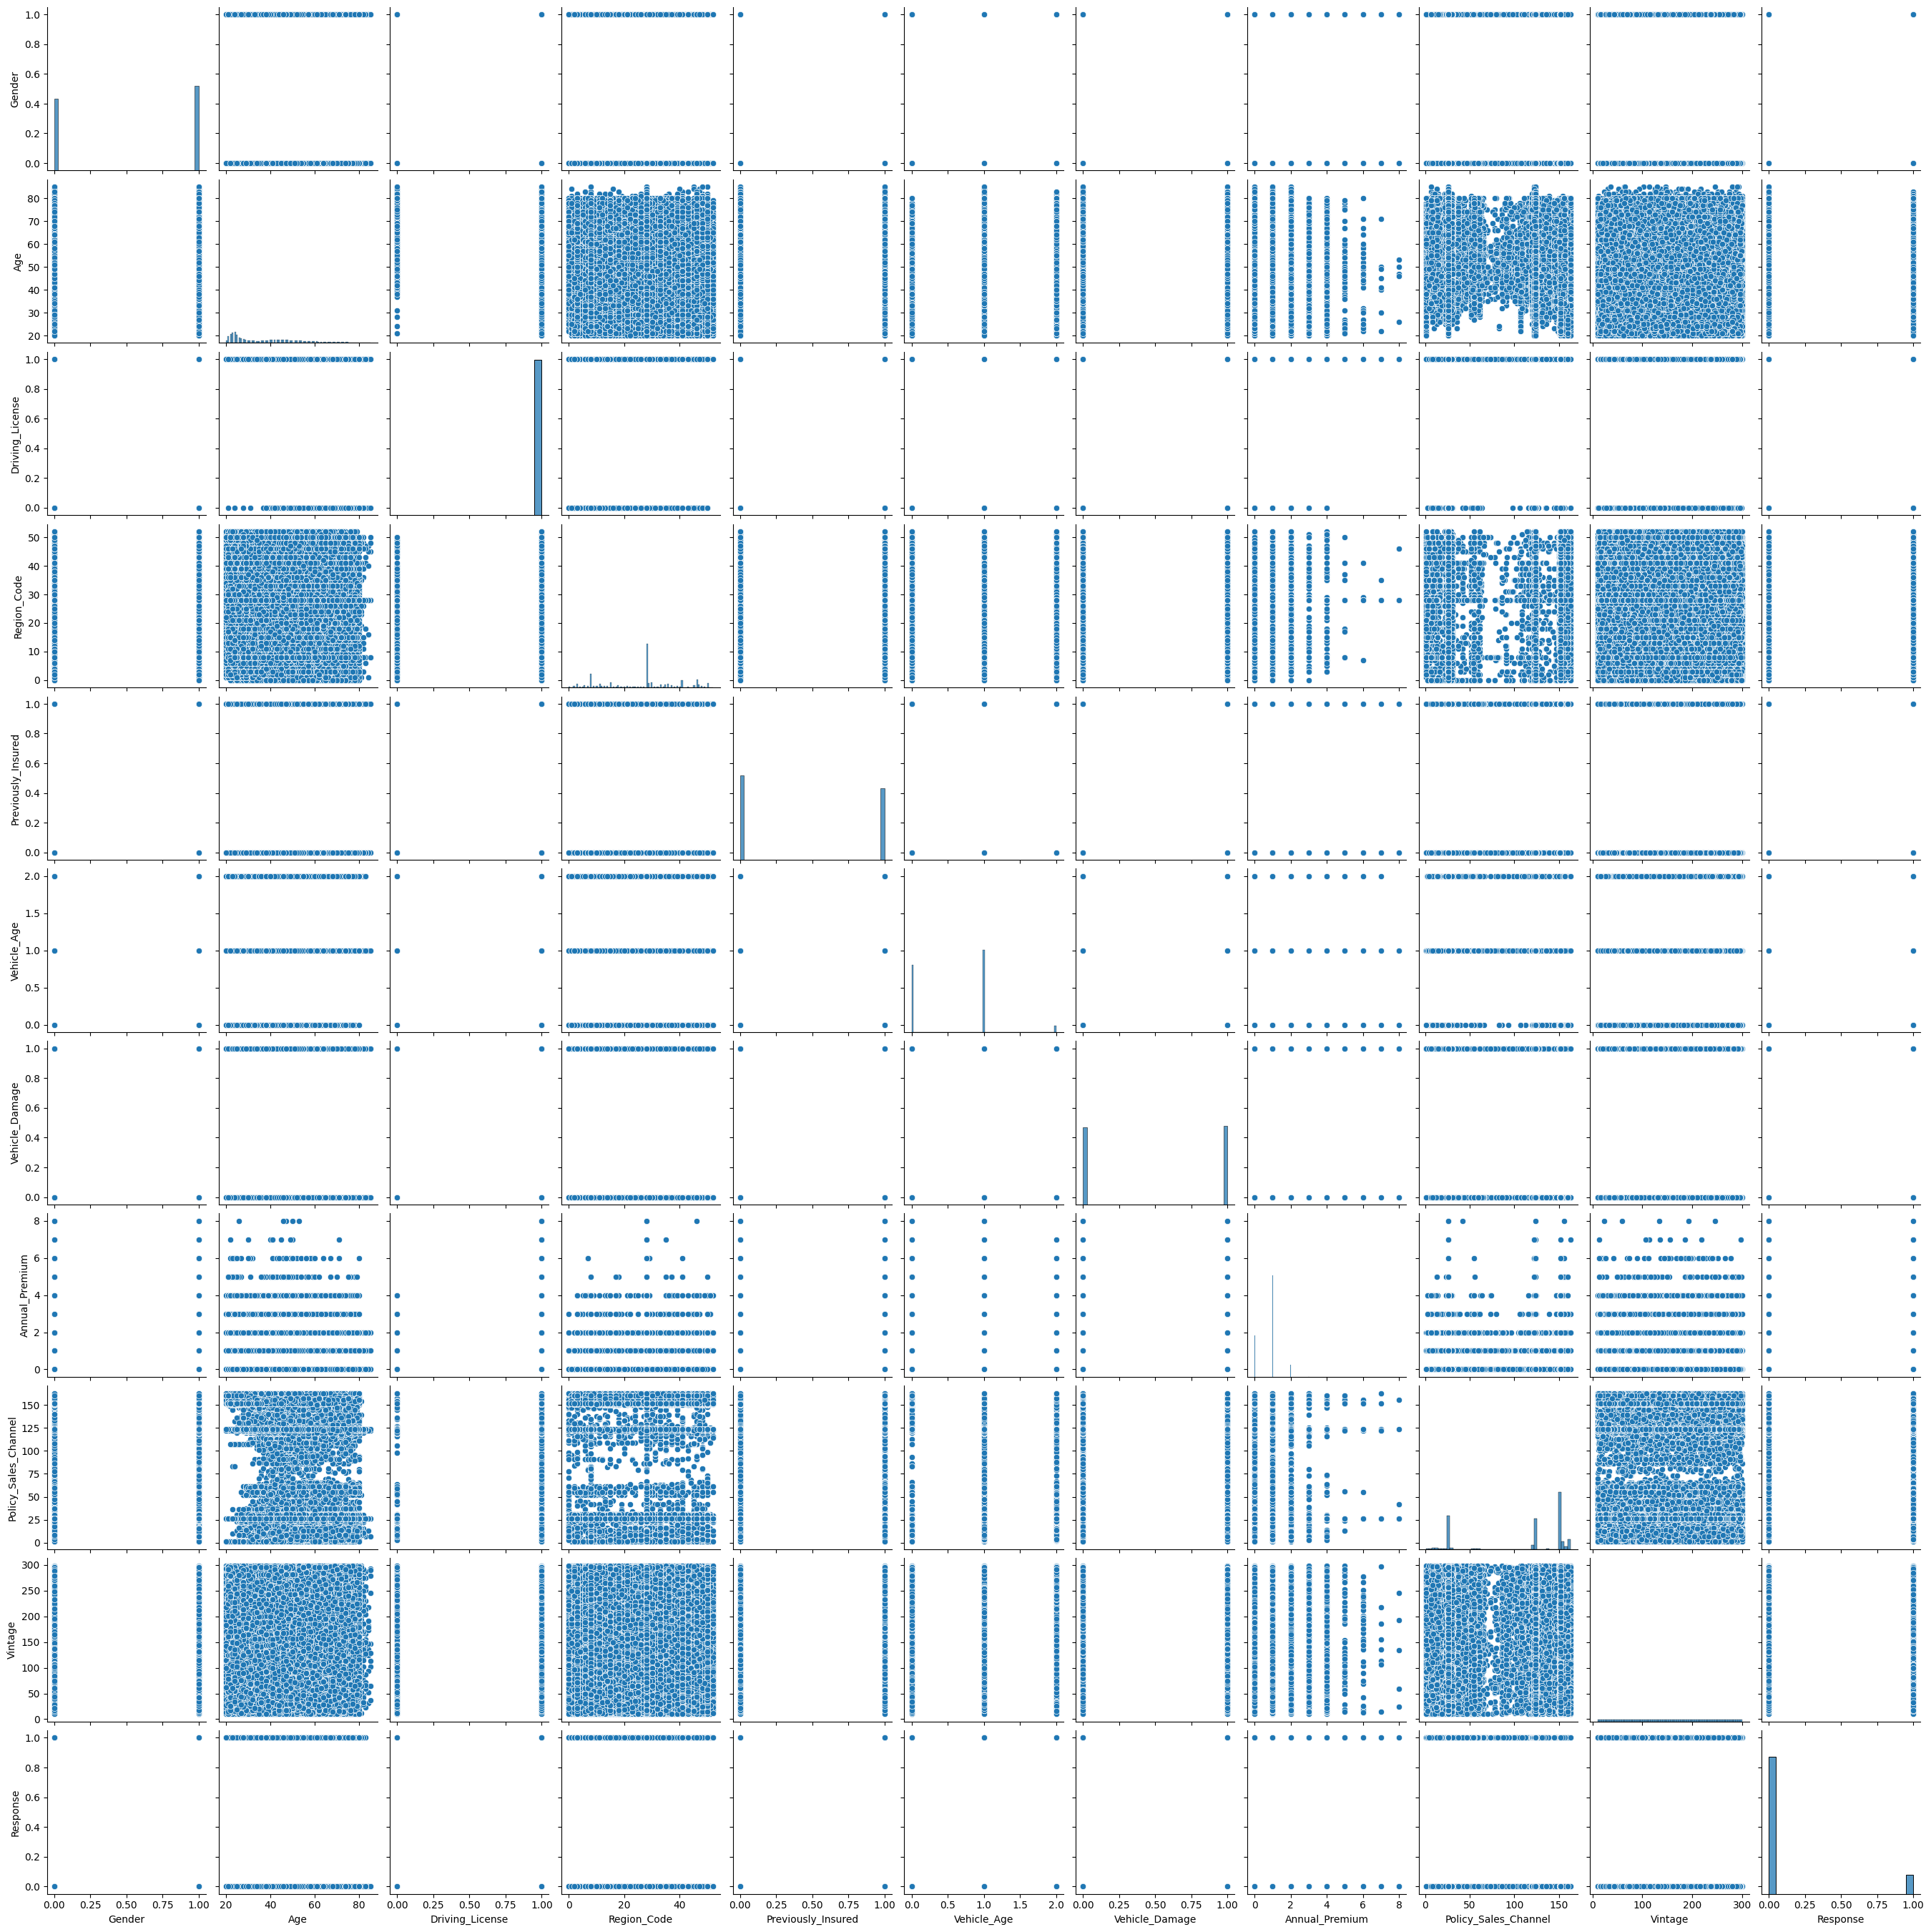

In [ ]:
#Pair Plot visualization code

sns.pairplot(data=df)
plt.show()

##### 1. Why did you pick the specific chart?

* To see relationship between each variable with other.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - To check data is normally distributed or not.
 * 1 -Normality test using Shapiro wilk test
 * 2 - Normality test using K^2 Normality test.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis H0= Data is normally distributed
* Alternative hypothesis Ha=Data is not normally distributed

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#import shapiro
print('1 -Normality test using Shapiro wilk test')
from scipy.stats import shapiro
print('check P-value of Age Feature')
DataToCheck=df['Age']
stat,p=shapiro(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)

print('check P-value of Vintage Feature')
DataToCheck=df['Vintage']
stat,p=shapiro(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)

## USING K^2 NORMALITY TEST.

from scipy.stats import normaltest
print('check P-value of Age Feature')
DataToCheck=df['Age']
stat,p=normaltest(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)

print('check P-value of Vintage Feature')
DataToCheck=df['Vintage']
stat,p=normaltest(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)

print('2 - Normality test using K^2 Normality test.')

"""#Just trial took some random number and run in shapiro walk test
print('check P-value of Vintage Feature')
DataToCheck=np.random.randn(100)
stat,p=shapiro(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)"""


1 -Normality test using Shapiro wilk test
check P-value of Age Feature
stat=0.91,p=0.000000000000000000000000000000
Not normally distributed
--------------------------------------------------
check P-value of Vintage Feature
stat=0.96,p=0.000000000000000000000000000000
Not normally distributed
--------------------------------------------------
check P-value of Age Feature
stat=34258.37,p=0.000000000000000000000000000000
Not normally distributed
--------------------------------------------------
check P-value of Vintage Feature
stat=340598.38,p=0.000000000000000000000000000000
Not normally distributed
--------------------------------------------------
2 - Normality test using K^2 Normality test.


'#Just trial took some random number and run in shapiro walk test\nprint(\'check P-value of Vintage Feature\')\nDataToCheck=np.random.randn(100)\nstat,p=shapiro(DataToCheck)\nprint(\'stat=%.2f,p=%.30f\'%(stat,p))\nif p >0.05:\n  print("normal distribution")\nelse:\n  print(\'Not normally distributed\')\nprint(\'--\'*25)'

##### Which statistical test have you done to obtain P-Value?

* Shapiro wilk test used here to check distribution of Feature Data.
* K^2 Normality test to check distribution of data.

##### Why did you choose the specific statistical test?

* Its used to check Normality distribution of data.


### Hypothetical Statement - Correlation test.
 * 1- Pearson and Spearmans Rank Correlation for numerical data.
 * 2-Chi-square test categorical data.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* H0-Independent to each other
* Ha-Dependent to each other

#### 2. Perform an appropriate statistical test.

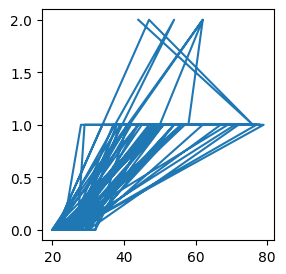

In [ ]:
First_sample=df['Age'][:100]
Second_sample=df['Vehicle_Age'][:100]
plt.figure(figsize=(3,3))
plt.plot(First_sample,Second_sample)
plt.show()

In [ ]:
# Perform Statistical Test to obtain P-Value
# import
from scipy.stats import spearmanr,pearsonr

print('1- Spearmans Rank Correlation Age and Vehicle_Age.')

print('check P-value ')
stat,p=spearmanr(First_sample,Second_sample)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("Independent to each other")
else:
  print('Dependent to each other')
print('--'*25)

print('2- Spearmans Rank Correlation Vintage and Age.')

print('check P-value ')
stat,p=spearmanr(df['Vintage'][:100],df['Age'][:100])
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("Independent to each other")
else:
  print('Dependent to each other')
print('--'*25)

print('1- Pearson  Rank Correlation Age and Vehicle_Age.')
print('check P-value of Age Feature')
stat,p=pearsonr(First_sample,Second_sample)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("Independent to each other")
else:
  print('Dependent to each other')
print('--'*25)

print('2- Pearson  Rank Correlation Vintage and Age.')
print('check P-value')
stat,p=pearsonr(df['Vintage'][:100],df['Age'][:100])
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("Independent to each other")
else:
  print('Dependent to each other')
print('--'*25)




1- Spearmans Rank Correlation Age and Vehicle_Age.
check P-value 
stat=0.82,p=0.000000000000000000000000117447
Dependent to each other
--------------------------------------------------
2- Spearmans Rank Correlation Vintage and Age.
check P-value 
stat=-0.08,p=0.409529939022021394201544808311
Independent to each other
--------------------------------------------------
1- Pearson  Rank Correlation Age and Vehicle_Age.
check P-value of Age Feature
stat=0.76,p=0.000000000000000000057230796486
Dependent to each other
--------------------------------------------------
2- Pearson  Rank Correlation Vintage and Age.
check P-value
stat=-0.04,p=0.702266481484021154457764168910
Independent to each other
--------------------------------------------------


In [ ]:
### FOR CHI_SQUARE TEST.
contigency_data=pd.crosstab(df['Gender'],df['Vehicle_Damage'],margins=False)
print(contigency_data)

#import library
from scipy.stats import chi2_contingency

print('1- using Chi^2 test Gender and Vehicle_damage.')

print('check P-value ')
stat,p,dof,expected=chi2_contingency(contigency_data)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("Independent to each other")
else:
  print('Dependent to each other')
print('--'*25)

contigency_data=pd.crosstab(df['Gender'],df['Vehicle_Damage'],margins=False)
print(contigency_data)



print('2- using Chi^2 test Policy_Sales_Channel and Gender.')
contigency_data=pd.crosstab(df['Policy_Sales_Channel'],df['Vintage'],margins=False)
print(contigency_data)


print('check P-value ')
stat,p,dof,expected=chi2_contingency(contigency_data)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("Independent to each other")
else:
  print('Dependent to each other')
print('--'*25)




Vehicle_Damage      0       1
Gender                       
0               95355   79665
1               93341  112748
1- using Chi^2 test Gender and Vehicle_damage.
check P-value 
stat=3197.76,p=0.000000000000000000000000000000
Dependent to each other
--------------------------------------------------
Vehicle_Damage      0       1
Gender                       
0               95355   79665
1               93341  112748
2- using Chi^2 test Policy_Sales_Channel and Gender.
Vintage               10   11   12   13   14   15   16   17   18   19   ...  \
Policy_Sales_Channel                                                    ...   
1.0                     8    5    3    1    5    2    1    3    3    1  ...   
2.0                     0    0    0    0    0    0    0    0    0    0  ...   
3.0                     6    2    2    2    1    3    2    1    2    2  ...   
4.0                     1    1    1    2    5    1    2    2    1    0  ...   
6.0                     0    0    0    0    0   

##### Which statistical test have you done to obtain P-Value?

* Spearman and Pearson test used to check Correlation between Feature.

##### Why did you choose the specific statistical test?

* To check correlation between feature.

### Hypothetical Statement - 3-Parameters Tests
 * 1- T-test for one sample,independent sample,Pair sample.
 * 2- Annova Test-whether mean of two or more independent sample are significantly different.
 * 3- Non parameters test-Mann Whitney U-test- whether Distribution of two or more sample are equal or not.
 * 4-Augmented Dickey Fuller test- for time series analysis.either stationary data or not.(eg.apply share market price variation)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* H0 :
* Ha :

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

print('mean of Age : ',df['Age'].mean())
print('mean of Annual_Premium : ',df['Annual_Premium'].mean())

### One Sample T_test

from scipy.stats import ttest_1samp
#here Assumming multiple value as mean value then check hythesis is true or not
for i in [38.822,0,100,40]:
  print('hypothesis ',1)
  stat,p_value=ttest_1samp(df['Age'],i)
  if p_value >0.05:
    print("H0 : The mean value is ",i)
  else:
    print("Ha : Our assumation is wrong")
    print('--'*20)

### INDEPENDENT SAMPLE T-TEST
# Here we assume H0 : mean of one sample is equal to mean of other
from scipy.stats import ttest_ind
print('hypothesis-2')
stat,p_value=ttest_ind(df['Age'],df['Annual_Premium'])
if p_value >0.05:
  print("H0 : The mean value is Same")
else:
  print("Ha : Our assumation is wrong")
  print('--'*20)

### PAIR SAMPLE T TEST IS USE FOR SAME DATA WITH VARRYING TIME AND COMPARE IT
print('hypothesis-3')
from scipy.stats import ttest_rel
stat,p_value=ttest_rel(df['Annual_Premium'][:100],df['Annual_Premium'][100:200])
if p_value >0.05:
  print("H0 : The mean value is Same")
else:
  print("Ha : Our assumation is wrong")
  print('--'*20)




mean of Age :  38.822583565331705
mean of Annual_Premium :  0.8307282168618427
hypothesis  1
H0 : The mean value is  38.822
hypothesis  1
Ha : Our assumation is wrong
----------------------------------------
hypothesis  1
Ha : Our assumation is wrong
----------------------------------------
hypothesis  1
Ha : Our assumation is wrong
----------------------------------------
hypothesis-2
Ha : Our assumation is wrong
----------------------------------------
hypothesis-3
H0 : The mean value is Same


In [ ]:
### ANOVA TEST- whether mean of two or more independent sample are significantly different
print('Mean of age',df['Age'].mean())
print('Mean of Annual_Premium',df['Annual_Premium'].mean())
print('Mean of Vintage',df['Vintage'].mean())

#import
from scipy.stats import f_oneway

stat,p_value=f_oneway(df['Age'],df['Annual_Premium'],df['Vintage'])

print('%.3f'%stat,'%.10f'%p_value)
if p_value > 0.05:
  print('Same distribution of mean')
else:
  print('Different distribution of mean')
print('--'*20)

Mean of age 38.822583565331705
Mean of Annual_Premium 0.8307282168618427
Mean of Vintage 154.34739667654136
1009277.992 0.0000000000
Different distribution of mean
----------------------------------------


In [ ]:
#3- Non parameters test-Mann Whitney U-test- whether Distribution of two or more sample are equal or not.

#import
from scipy.stats import mannwhitneyu

print('hypothesis-1')
stat,p_value=mannwhitneyu(df['Age'],df['Annual_Premium'])
if p_value >0.05:
  print("H0 : The mean value is Same")
else:
  print("Ha : Our assumation is wrong")
  print('--'*20)

#trial
print('hypothesis-2')
stat,p_value=mannwhitneyu(df['Annual_Premium'][:100],df['Annual_Premium'][100:200])
if p_value >0.05:
  print("H0 : The mean value is Same")
else:
  print("Ha : Our assumation is wrong")
  print('--'*20)



hypothesis-1
Ha : Our assumation is wrong
----------------------------------------
hypothesis-2
H0 : The mean value is Same


In [ ]:
#Test of Stationary-Very important for time series analysis
#Augmented Dickey Fuller test- Null hypothesis : Series is non stationary

from statsmodels.tsa.stattools import adfuller
stat,p,lag,obs,crit,t=adfuller(df['Age'][:100])

print('stat=%.2f,p=%.10f'%(stat,p))
if p >0.05:
  print("Series is non stationary")
else:
  print('Series is stationary')
print('--'*25)

stat=-7.17,p=0.0000000003
Series is stationary
--------------------------------------------------


##### Which statistical test have you done to obtain P-Value?

* Here we have tried too many test like augmented dickey fuller,Mann Whitney U-test,Anova test,T-test(One Sample T_test,Individual sample,Pair sample t test)

##### Why did you choose the specific statistical test?

* Just try to get knowledge

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation (Already check above just showing code here)

# Missing Values/Null Values Count
missing_values= df.isna().sum().sum()
print(f"Dataset has no of Null values - {missing_values}" )

Dataset has no of Null values - 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

* Here is no one missing value so no need to do anything.

### 2. Handling Outliers

<Figure size 400x400 with 0 Axes>

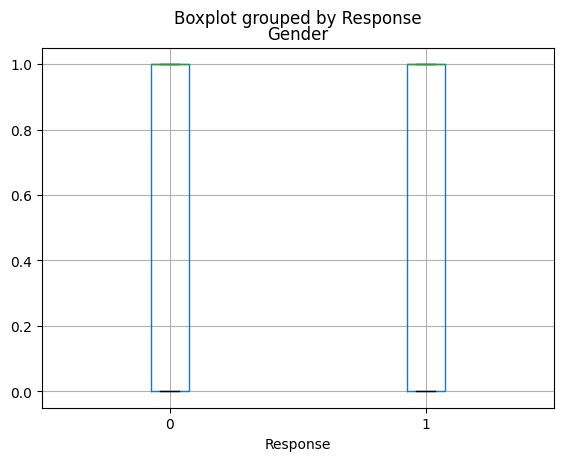

<Figure size 400x400 with 0 Axes>

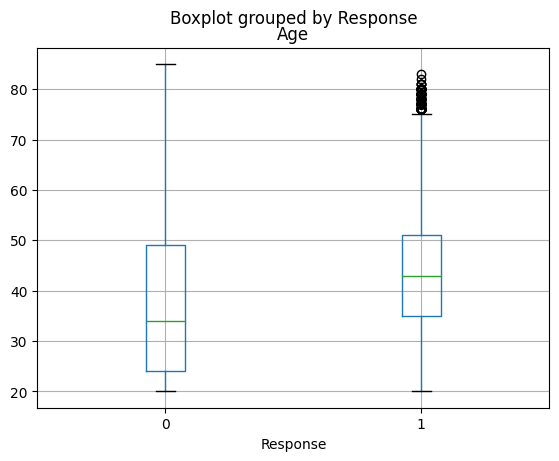

<Figure size 400x400 with 0 Axes>

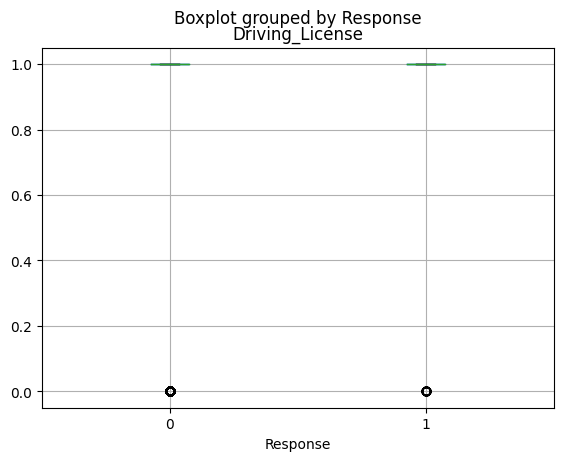

<Figure size 400x400 with 0 Axes>

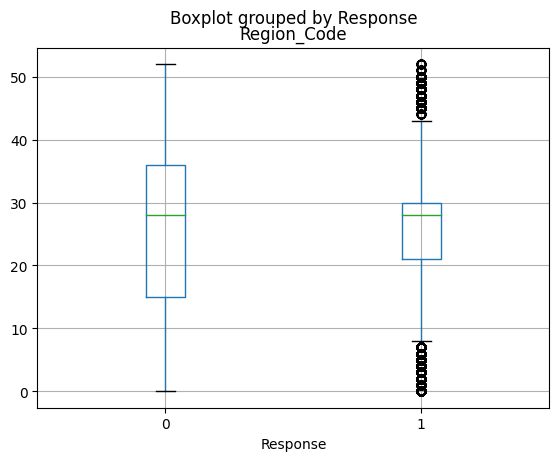

<Figure size 400x400 with 0 Axes>

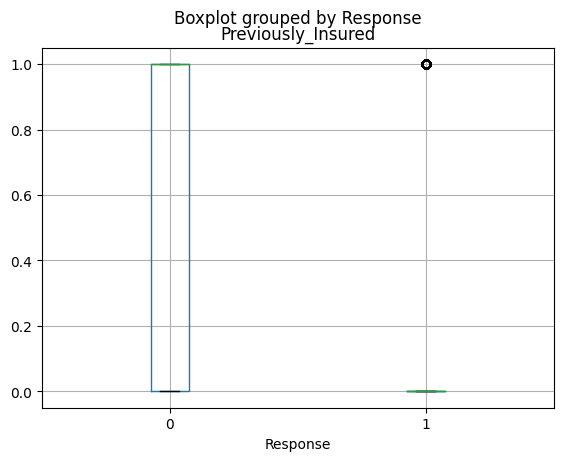

<Figure size 400x400 with 0 Axes>

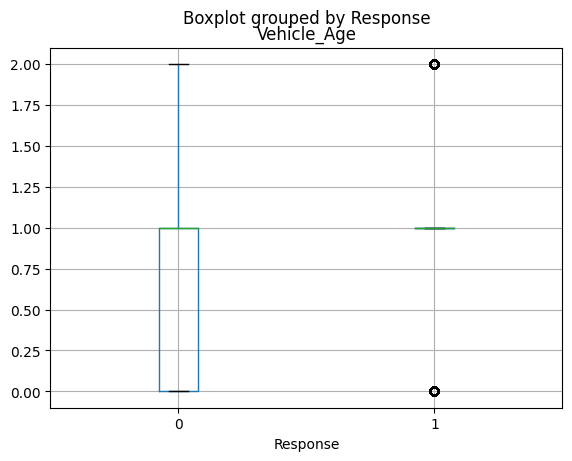

<Figure size 400x400 with 0 Axes>

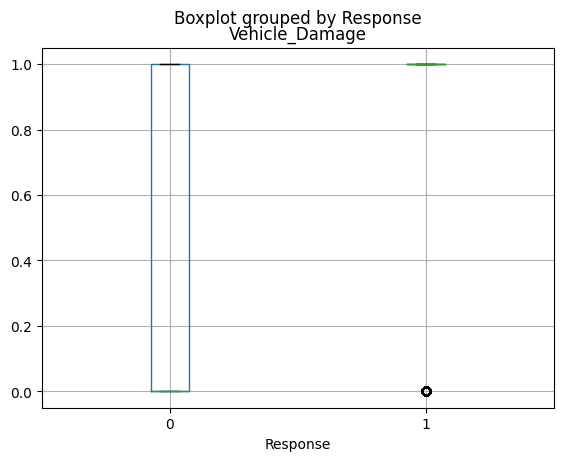

<Figure size 400x400 with 0 Axes>

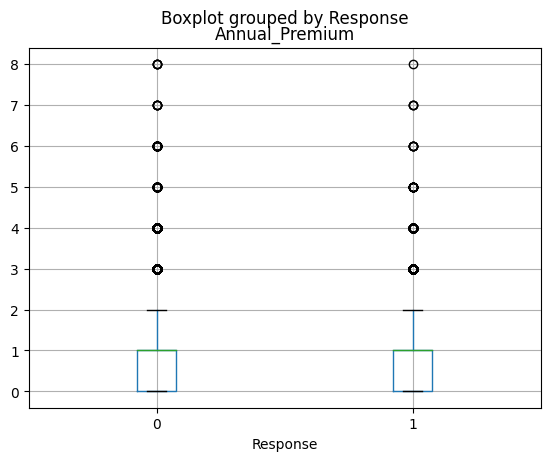

<Figure size 400x400 with 0 Axes>

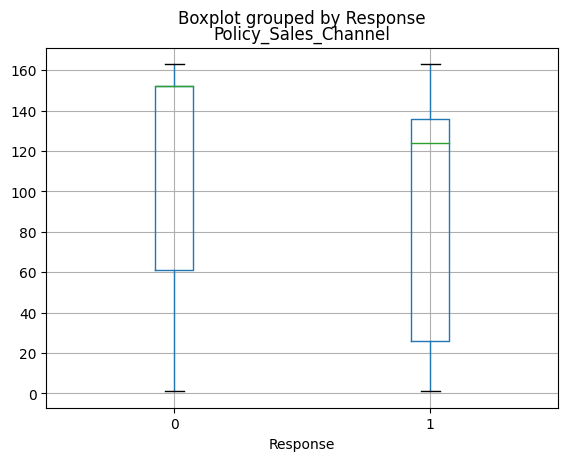

<Figure size 400x400 with 0 Axes>

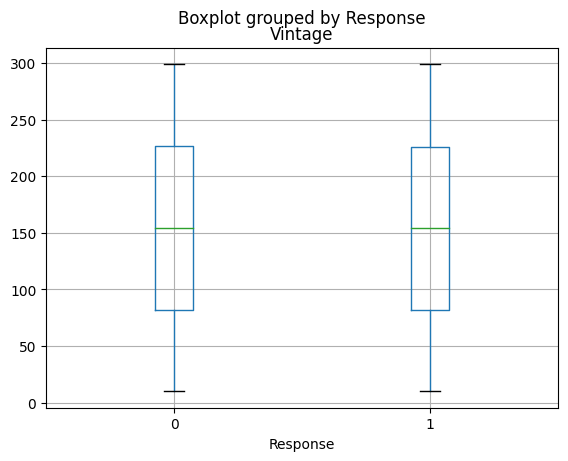

<Figure size 400x400 with 0 Axes>

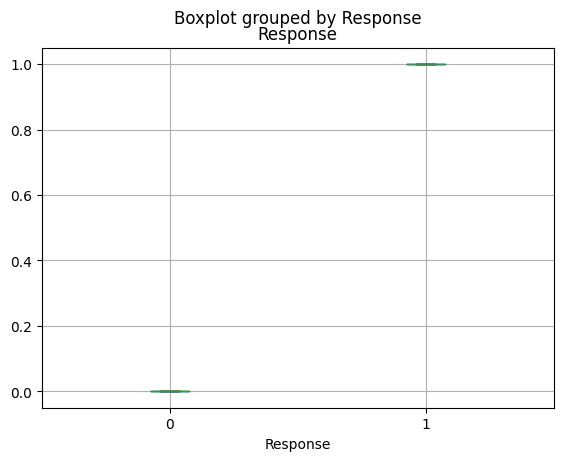

In [ ]:
# Handling Outliers & Outlier treatments
for i in df.columns:
  plt.figure(figsize=(4,4))
  df.boxplot(column=i,by='Response')
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns('already done above just showing code here')

"""# Need to convert categorical value into numerical format

#1--Replace Gender type male by 1 and female by 0 (categorical feature)

df['Gender']=np.where(df['Gender']=='Male',1,0)


#2--Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2)

df['Vehicle_Age']=df['Vehicle_Age'].apply(lambda x : 0 if x=='< 1 Year' else (1 if x== '1-2 Year' else 2))

#3--Replace Vehicle_Damage (Yes by 1 & No by 0)

df['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda x : 1 if x=='Yes' else 0)

#4--Replace Annual_Premium (0 < x <= 25000 by 0, 25000 < x <= 50000 by 1,50000 < x <= 75000  by 2,75000 < x <= 100000 by 3,100000 < x <= 200000 by 4,200000 < x <= 300000 by 5,300000 < x <= 400000 by 6,400000 < x <= 500000 by 7, above 500000 by 8)

df['Annual_Premium']=df['Annual_Premium'].apply(lambda x : 0 if 0 < x <= 25000 else(1 if 25000 < x <= 50000 else(2 if 50000 < x <= 75000 else(3 if 75000 < x <= 100000 else(4 if 100000 < x <= 200000 else(5 if 200000 < x <= 300000 else(6 if 300000 < x <= 400000 else(7 if 400000 < x <= 500000 else 8))))))))
"""
# Policy_Sales_Channel has to many unique value so categories it into 5 catefory.
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].apply(lambda x : 0 if x<=20 else(1 if 20<x<=40 else(2 if 40<x<=120 else(3 if 120<x<=140 else 4))))

# Region_Code has to many unique value so categories it into 5 catefory.
df['Region_Code']=df['Region_Code'].apply(lambda x : 0 if x<=10 else(1 if 10<x<=20 else(2 if 20<x<=30 else(3 if 30<x<=40 else 4))))

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Just because we have to fit all data into ML-modules

### 4. Textual Data Preprocessing  (No need here because no textual data )
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# create function to calculate vif
def cal_vif(x):
  vif=pd.DataFrame()
  vif['variables']=x.columns
  vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return vif

In [ ]:
#calculate VIF
cal_vif(df[[i for i in df.columns if i not in ['Response','Driving_License']]])

variables        VIF
0                Gender   2.202899
1                   Age  13.830833
2           Region_Code   3.133534
3    Previously_Insured   4.779126
4           Vehicle_Age   6.118524
5        Vehicle_Damage   5.347875
6        Annual_Premium   2.805508
7  Policy_Sales_Channel   5.702250
8               Vintage   4.095523

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
features=cal_vif(df[[i for i in df.columns if i not in ['Response','Driving_License']]])['variables']  # # Here we ignore age just because in auc roc score FP and TP comes 0 so
features

0                  Gender
1                     Age
2             Region_Code
3      Previously_Insured
4             Vehicle_Age
5          Vehicle_Damage
6          Annual_Premium
7    Policy_Sales_Channel
8                 Vintage
Name: variables, dtype: object

##### What all feature selection methods have you used  and why?

* We have use Varience inflation factor method to check highly correlated feature.
* Here we got three highly correlated feature so we ignore them for further calculation.

##### Which all features you found important and why?

* We have mentioned all important feature in features list. who are least correlated with each others.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#'NO need here'

### 6. Data Scaling

In [ ]:
# Scaling your data
std=StandardScaler()
std.fit(df[['Age','Vintage']])
df[['Age','Vintage']]=std.transform(df[['Age','Vintage']])

##### Which method have you used to scale you data and why?

* StandardScaler method used here to standardize numerical data and convert it into specific range.

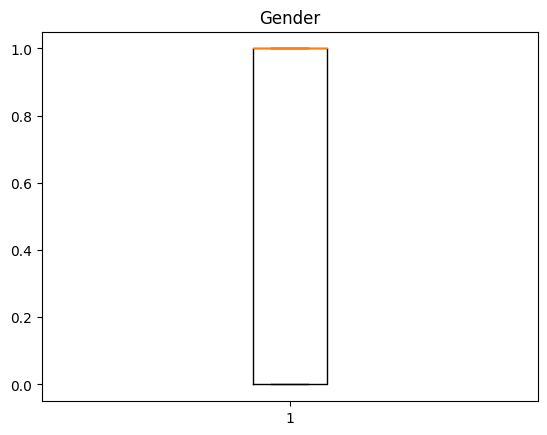

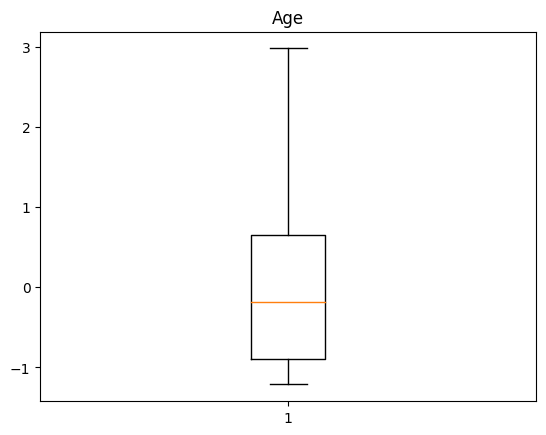

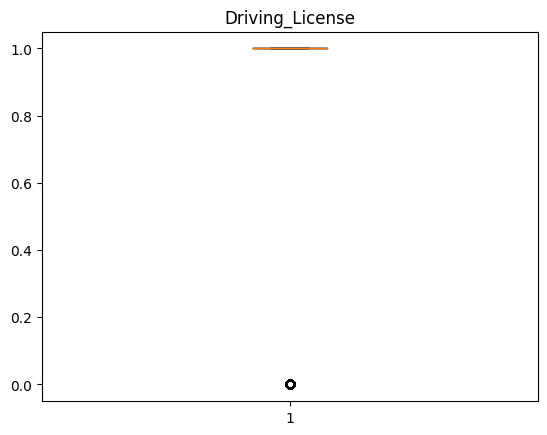

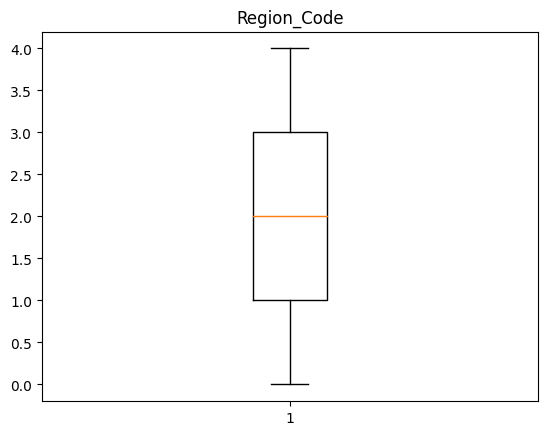

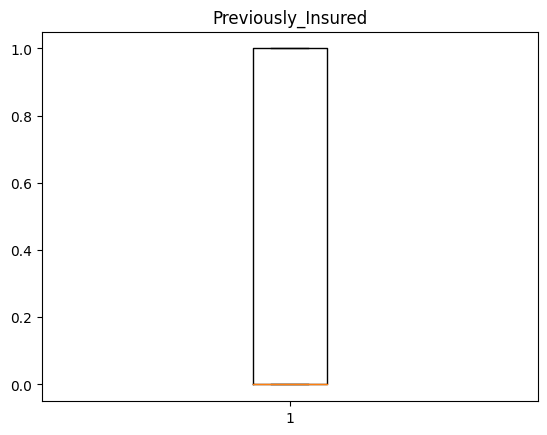

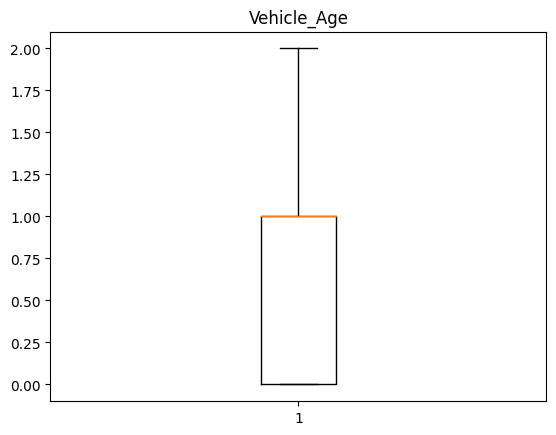

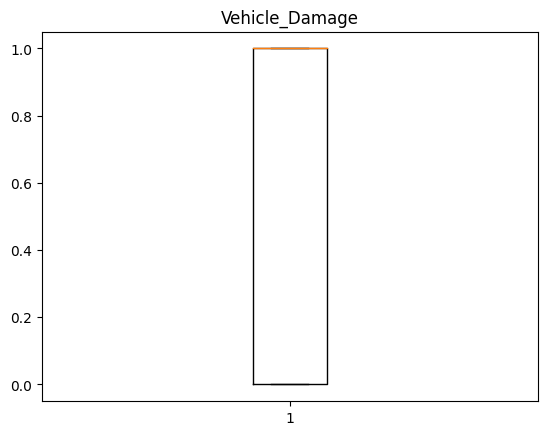

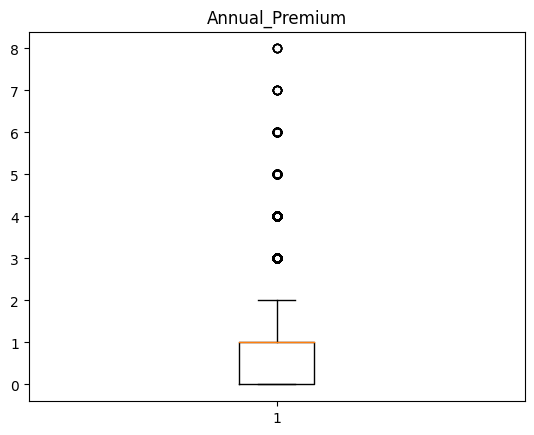

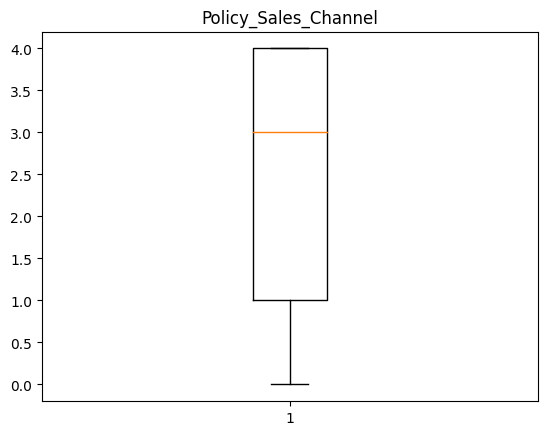

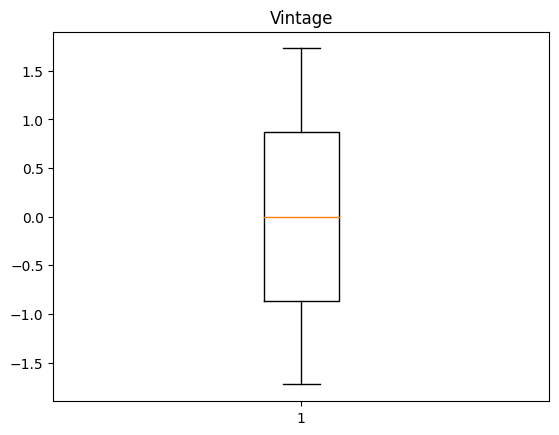

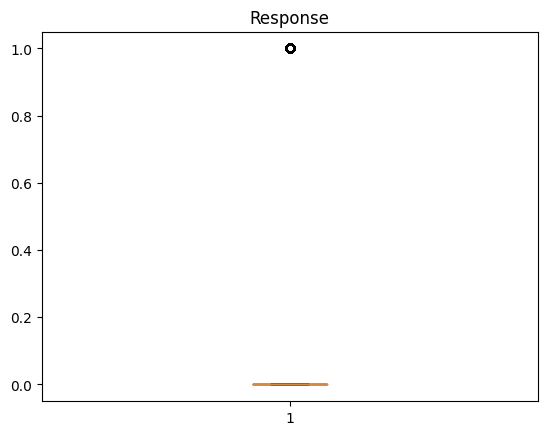

In [ ]:
for i in df.columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df[features].values
y=df['Response'].values

# apply train_test_module
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

##### What data splitting ratio have you used and why?

* We have splited 80:20  for train to test module.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
print(df['Response'].value_counts())

## Used TOMEK LINK TO HANDLING IMBALANCE DATA SET

from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

X_tl, y_tl = tl.fit_resample(X, y)

print('Original dataset shape:', len(df))
print('Resampled dataset shape', len(y_tl))
#print(y_tl.value_counts())

0    334399
1     46710
Name: Response, dtype: int64
Original dataset shape: 381109
Resampled dataset shape 367036


In [ ]:


# apply train_test_module
X_train,X_test,y_train,y_test=train_test_split(X_tl,y_tl,test_size=0.2,random_state=1,stratify=y_tl)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* We have used TomekLink technique here to balance Imbalnce data set.

## ***7. ML Model Implementation***

### ML Model - 1 - Logistics Regression

In [ ]:

# ML Model - 1 Implementation-Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,confusion_matrix,classification_report

# Fit the Algorithm
LR=LogisticRegression(fit_intercept=True,max_iter=10000)
LR.fit(X_train,y_train)

# Predict on the model
y_train_LR=LR.predict(X_train)
y_test_LR=LR.predict(X_test)

accuracy_for_train=accuracy_score(y_train,y_train_LR)
accuracy_for_test=accuracy_score(y_test,y_test_LR)
roc_auc_score_train=roc_auc_score(y_train,y_train_LR)
roc_auc_score_test=roc_auc_score(y_test,y_test_LR)
confusion_matrix_train=confusion_matrix(y_train,y_train_LR)
confusion_matrix_test=confusion_matrix(y_test,y_test_LR)

print(f'Accurancy score for train dataset is {accuracy_for_train}')
print(f'Accurancy score for test dataset is {accuracy_for_test}')
print(f'roc auc score for train dataset is {roc_auc_score_train}')
print(f'roc auc score for test dataset is {roc_auc_score_test}')
print(f'confusion matrics for train dataset is \n {confusion_matrix_train}')
print(f'confusion matrics for test dataset is \n {confusion_matrix_test}')


Accurancy score for train dataset is 0.8725291865898348
Accurancy score for test dataset is 0.8726160636442895
roc auc score for train dataset is 0.5105216483930874
roc auc score for test dataset is 0.5104904511907388
confusion matrics for train dataset is 
 [[255268    992]
 [ 36437    931]]
confusion matrics for test dataset is 
 [[63826   240]
 [ 9111   231]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

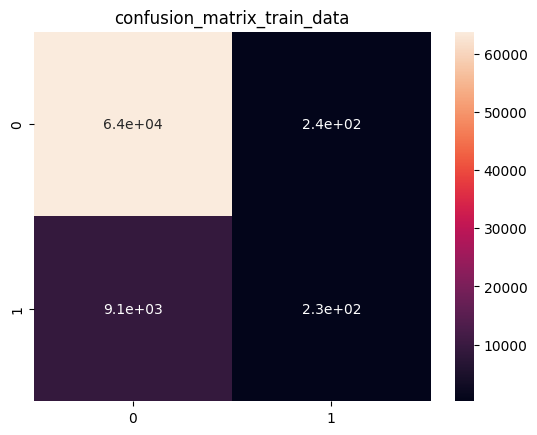

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix_test,annot=True)
plt.title('confusion_matrix_train_data')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (cross validation)
from sklearn.model_selection import cross_validate
logistic = LogisticRegression()

# Fit the Algorithm
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

# Predict on the model
print('train accuracy\n',scores['train_accuracy'])
print('test accuracy\n',scores['test_accuracy'])


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.873, test=0.873) total time=   1.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.1s


[CV] END ................ accuracy: (train=0.873, test=0.873) total time=   1.3s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.873, test=0.873) total time=   1.7s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.873, test=0.873) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    6.0s


[CV] END ................ accuracy: (train=0.873, test=0.872) total time=   1.4s
train accuracy
 [0.87252982 0.87256388 0.87256388 0.87252185 0.87265808]
test accuracy
 [0.87256071 0.87262882 0.87250962 0.87271179 0.87216688]


##### Which hyperparameter optimization technique have you used and why?

* Here I Tried to apply cross validate method to avoid models overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Accuracy of model is good but its showing that auc_roc score is 0.5 its not good.
* So need to tries other module also.


### ML Model - 2-Decision Tree Classifier (Information Gain method) and GridserchCV with Bagging technique (Random forest classifier)

In [ ]:
# ML Model - 2 Implementation-DecisionTreeClassifier

# import required library
from sklearn.tree import DecisionTreeClassifier

### First try to apply INFORMATION GAIN technique

decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=10)
# Fit the Algorithm
decision_tree.fit(X_train,y_train)
# Predict on the model
y_train_DT=decision_tree.predict(X_train)
y_test_DT=decision_tree.predict(X_test)

accuracy_for_train=accuracy_score(y_train,y_train_DT)
accuracy_for_test=accuracy_score(y_test,y_test_DT)
roc_auc_score_train=roc_auc_score(y_train,y_train_DT)
roc_auc_score_test=roc_auc_score(y_test,y_test_DT)
confusion_matrix_train=confusion_matrix(y_train,y_train_DT)
confusion_matrix_test=confusion_matrix(y_test,y_test_DT)
classification_report_train=classification_report(y_train,y_train_DT)
classification_report_test=classification_report(y_test,y_test_DT)

print(f'Accurancy score for train dataset is {accuracy_for_train}')
print(f'Accurancy score for test dataset is {accuracy_for_test}')
print(f'roc auc score for train dataset is {roc_auc_score_train}')
print(f'roc auc score for test dataset is {roc_auc_score_test}')
print(f'confusion matrics for train dataset is \n {confusion_matrix_train}')
print(f'confusion matrics for test dataset is \n {confusion_matrix_test}')
print(f'confusion matrics for train dataset is \n {classification_report_train}')
print(f'confusion matrics for test dataset is \n {classification_report_test}')


Accurancy score for train dataset is 0.8738812374841637
Accurancy score for test dataset is 0.8733789232781168
roc auc score for train dataset is 0.5207139865174866
roc auc score for test dataset is 0.5199338042817825
confusion matrics for train dataset is 
 [[254841   1419]
 [ 35613   1755]]
confusion matrics for test dataset is 
 [[63685   381]
 [ 8914   428]]
confusion matrics for train dataset is 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93    256260
           1       0.55      0.05      0.09     37368

    accuracy                           0.87    293628
   macro avg       0.72      0.52      0.51    293628
weighted avg       0.84      0.87      0.82    293628

confusion matrics for test dataset is 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     64066
           1       0.53      0.05      0.08      9342

    accuracy                           0.87     73408
   macro 

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

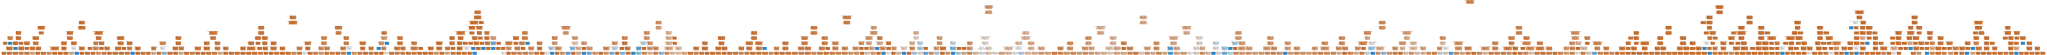

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

# Export the decision tree to graphviz format
graph = Source(tree.export_graphviz(decision_tree, out_file=None
               , feature_names=features, class_names=['0', '1']
               , filled = True ))
# Display the decision tree using SVG format
display(SVG(graph.pipe(format='svg')))



#### 2. Cross- Validation & Hyperparameter Tuning (GridSearchCv and RandomForest baggin technique)

In [ ]:
# ML Model -  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# To check max accuracy at what max_depth of tree
from sklearn.model_selection import GridSearchCV
# We import bagging type ensembel technique here
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
grid_values={'n_estimators':[50,70,100],'max_depth':[3,5,7]}

decision_tree_cls=GridSearchCV(classifier,param_grid=grid_values,scoring='accuracy',cv=3)
# Fit the Algorithm
decision_tree_cls.fit(X_train,y_train)



GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 70, 100]},
             scoring='accuracy')

In [ ]:
print('Best_score - ', decision_tree_cls.best_score_)
print('Best_Max_depth - ',decision_tree_cls.best_params_)

Best_score -  0.8727369324451346
Best_Max_depth -  {'max_depth': 3, 'n_estimators': 50}


In [ ]:
decision_tree_cls=decision_tree_cls.best_estimator_

In [ ]:
# Predict on the model
y_train_DT=decision_tree_cls.predict(X_train)
y_test_DT=decision_tree_cls.predict(X_test)

accuracy_for_train=accuracy_score(y_train,y_train_DT)
accuracy_for_test=accuracy_score(y_test,y_test_DT)
roc_auc_score_train=roc_auc_score(y_train,y_train_DT)
roc_auc_score_test=roc_auc_score(y_test,y_test_DT)
confusion_matrix_train=confusion_matrix(y_train,y_train_DT)
confusion_matrix_test=confusion_matrix(y_test,y_test_DT)
classification_report_train=classification_report(y_train,y_train_DT)
classification_report_test=classification_report(y_test,y_test_DT)

print(f'Accurancy score for train dataset is {accuracy_for_train}')
print(f'Accurancy score for test dataset is {accuracy_for_test}')
print(f'roc auc score for train dataset is {roc_auc_score_train}')
print(f'roc auc score for test dataset is {roc_auc_score_test}')
print(f'confusion matrics for train dataset is \n {confusion_matrix_train}')
print(f'confusion matrics for test dataset is \n {confusion_matrix_test}')

print(f'confusion matrics for train dataset is \n {classification_report_train}')
print(f'confusion matrics for test dataset is \n {classification_report_test}')


Accurancy score for train dataset is 0.8727369324451346
Accurancy score for test dataset is 0.8727386660854403
roc auc score for train dataset is 0.5
roc auc score for test dataset is 0.5
confusion matrics for train dataset is 
 [[256260      0]
 [ 37368      0]]
confusion matrics for test dataset is 
 [[64066     0]
 [ 9342     0]]
confusion matrics for train dataset is 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93    256260
           1       0.00      0.00      0.00     37368

    accuracy                           0.87    293628
   macro avg       0.44      0.50      0.47    293628
weighted avg       0.76      0.87      0.81    293628

confusion matrics for test dataset is 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     64066
           1       0.00      0.00      0.00      9342

    accuracy                           0.87     73408
   macro avg       0.44      0.50      

In [ ]:
#check which feature more affecting the output of our model.
features
indices = np.argsort(features)

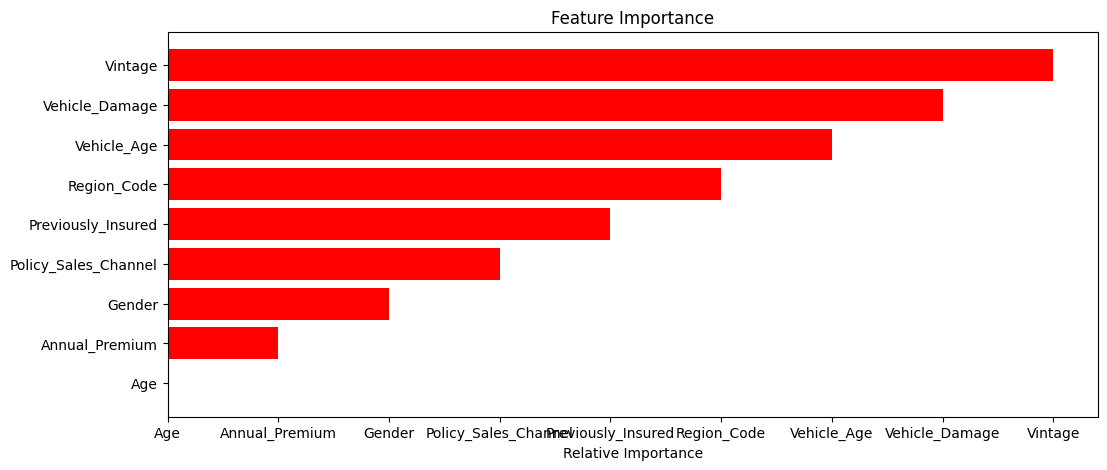

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), features[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

####LIME module(LOCAL INTERPRETABLE MODEL AGNOSTICS EXPLANATION)

In [ ]:
# Try to find which feature contribute our result with how much percent by using LIME moduele(LOCAL INTERPRETABLE MODEL AGNOSTICS EXPLANATION)
# IMPORT LIBREARY

In [ ]:
pip install lime

In [ ]:
features

0                  Gender
1                     Age
2             Region_Code
3      Previously_Insured
4             Vehicle_Age
5          Vehicle_Damage
6          Annual_Premium
7    Policy_Sales_Channel
8                 Vintage
Name: variables, dtype: object

In [ ]:
import lime
import lime.lime_tabular

def predict_proba_fn(x):
  return decision_tree_cls.predict_proba(x)

model_lm=lime.lime_tabular.LimeTabularExplainer(X_train,feature_names=features,kernel_width=3,verbose=True,categorical_features=['Gender', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Region_Code_0',
       'Region_Code_1', 'Region_Code_2', 'Region_Code_3', 'Region_Code_4',
       'Vehicle_Age_0', 'Vehicle_Age_1', 'Vehicle_Age_2'],mode='classification')
observation= 2
exe=model_lm.explain_instance(X_test[observation],predict_fn=predict_proba_fn,num_features=9)
exe.show_in_notebook(show_all=True)


Intercept 0.25202655494752624
Prediction_local [-0.03160667]
Right: 0.004303422607150916


#### SHAP (Shapley Additive exPlanations)

In [ ]:
# shap module implementation
!pip install shap
import shap


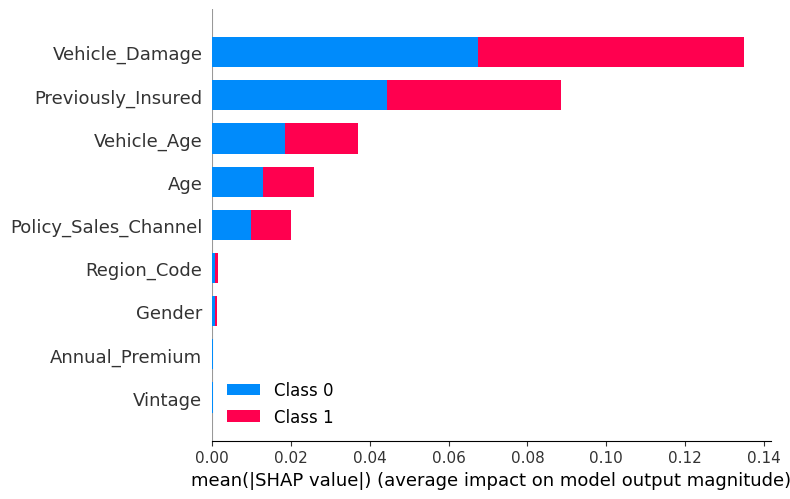

In [ ]:
# Check which feature are more Important
best_estimator = decision_tree_cls
shap_values = shap.TreeExplainer(best_estimator).shap_values(X_test)
shap.summary_plot(shap_values, X_test,feature_names=features)                #shap_values[0] then get for instance or row

####ELI5 Implementation

In [ ]:
!pip install eli5

In [ ]:
import eli5 as eli

In [ ]:
# Weights for Random Forest
eli.explain_weights(decision_tree)

Explanation(estimator="DecisionTreeClassifier(criterion='entropy', max_depth=10)", description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='x3', weight=0.7302373490600206, std=None, value=None), FeatureWeight(feature='x1', weight=0.1160259207894079, std=None, value=None), FeatureWeight(feature='x5', weight=0.09516184009890954, std=None, value=None), FeatureWeight(feature='x7', weight=0.018561003685969087, std=None, value=None), FeatureWeight(feature='x4', weight=0.015781587723172376, std=None, value=None), FeatureWeight(feature='x8', weight=0.013869820940518853, std=None, value=None), FeatureWeight(feature='x2', weight=0.004170955250765298, std=None, value=None), FeatureWeight(feature='x6', weight=0.003363796813370597, std=None, value=None), FeatureWeight(feature='x0', weight=0.002827725637865722, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='entropy', tree=NodeInfo(id=0, is_leaf=False, value=[256260.0, 37368.0], value_ratio=[0.8727369324451346, 0.12726306755486533], impurity=0.5498840731218743, samples=293628, sample_ratio=1.0, feature_name='x3', feature_id=3, threshold=0.5, left=NodeInfo(id=1, is_leaf=False, value=[116806.0, 37243.0], value_ratio=[0.7582392615336678, 0.24176073846633214], impurity=0.7979560857444744, samples=154049, sample_ratio=0.5246400207064721, feature_name='x5', feature_id=5, threshold=0.5, left=NodeInfo(id=2, is_leaf=False, value=[18028.0, 719.0], value_ratio=[0.9616471968848349, 0.03835280311516509], impurity=0.23468819968126578, samples=18747, sample_ratio=0.06384609097225061, feature_name='x1', feature_id=1, threshold=1.3974980115890503, left=NodeInfo(id=3, is_leaf=False, value=[16136.0, 699.0], value_ratio=[0.9584793584793585, 0.04152064152064152], impurity=0.24922135339952414, samples=16835, sample_ratio=0.05733445039301429, feature_name='x4', feature_id=4, threshold=0.5, left=NodeInfo(id=4, is_leaf=False, value=[8520.0, 291.0], value_ratio=[0.9669731018045625, 0.03302689819543752], impurity=0.20935153583198168, samples=8811, sample_ratio=0.03000735624667947, feature_name='x1', feature_id=1, threshold=-1.1812188625335693, left=NodeInfo(id=5, is_leaf=False, value=[408.0, 3.0], value_ratio=[0.9927007299270073, 0.0072992700729927005], impurity=0.06230254712077372, samples=411, sample_ratio=0.0013997302709550861, feature_name='x6', feature_id=6, threshold=0.5, left=NodeInfo(id=6, is_leaf=False, value=[173.0, 3.0], value_ratio=[0.9829545454545454, 0.017045454545454544], impurity=0.12451360225481532, samples=176, sample_ratio=0.0005993978775866061, feature_name='x8', feature_id=8, threshold=-1.5100465416908264, left=NodeInfo(id=7, is_leaf=False, value=[7.0, 1.0], value_ratio=[0.875, 0.125], impurity=0.5435644431995964, samples=8, sample_ratio=2.7245358072118462e-05, feature_name='x8', feature_id=8, threshold=-1.5698042511940002, left=NodeInfo(id=8, is_leaf=True, value=[7.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=7, sample_ratio=2.3839688313103654e-05, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=9, is_leaf=True, value=[0.0, 1.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=1, sample_ratio=3.4056697590148078e-06, feature_name=None, feature_id=None, threshold=None, left=None, right=None)), right=NodeInfo(id=10, is_leaf=False, value=[166.0, 2.0], value_ratio=[0.9880952380952381, 0.011904761904761904], impurity=0.09317131799548933, samples=168, sample_ratio=0.0005721525195144877, feature_name='x8', feature_id=8, threshold=0.5097645074129105, left=NodeInfo(id=11, is_leaf=False, value=[107.0, 2.0], value_ratio=[0.981651376146789, 0.01834862385321101], impurity=0.13206535647488304, samples=109, sample_ratio=0.0003712180037326141, feature_name='x8', feature_id=8, threshold=0.47988563776016235, left=NodeInfo(id=12, is_leaf=False, 

In [ ]:
# Decetion Tree  Explaining Prediction
eli.explain_prediction(decision_tree , np.array(X_test)[1])

Explanation(estimator="DecisionTreeClassifier(criterion='entropy', max_depth=10)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.8727369324451346, std=None, value=1.0), FeatureWeight(feature='x1', weight=0.10699393794526979, std=None, value=2.203346978873486), FeatureWeight(feature='x2', weight=0.044919367079779615, std=None, value=4.0), FeatureWeight(feature='x4', weight=0.013108687994136226, std=None, value=1.0), FeatureWeight(feature='x7', weight=0.009272852088504036, std=None, value=0.0)], neg=[FeatureWeight(feature='x3', weight=-0.11449767091146679, std=None, value=0.0), FeatureWeight(feature='x5', weight=-0.028183534345599615, std=None, value=1.0), FeatureWeight(feature='x8', weight=-0.005422547793460741, std=None, value=-1.2949187371082185)], pos_remaining=0, neg_remaining=0), proba=0.8989280245022971, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
# Random Forest  Show Prediction and explaining with all features
eli.show_prediction(decision_tree, X_test[1],

                    show_feature_values=True)

In [ ]:
# Decetion Tree  Explaining Prediction
eli.explain_prediction(best_estimator , np.array(X_test[1]))

Explanation(estimator='RandomForestClassifier(max_depth=3, n_estimators=50)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.8726919776043153, std=None, value=1.0), FeatureWeight(feature='x1', weight=0.008797148624802496, std=None, value=2.203346978873486), FeatureWeight(feature='x2', weight=0.0029322529470929325, std=None, value=4.0), FeatureWeight(feature='x0', weight=0.0007892273673602124, std=None, value=0.0)], neg=[FeatureWeight(feature='x5', weight=-0.07599002001863815, std=None, value=1.0), FeatureWeight(feature='x3', weight=-0.034968843917948175, std=None, value=0.0), FeatureWeight(feature='x4', weight=-0.022520433104867347, std=None, value=1.0), FeatureWeight(feature='x7', weight=-0.0065479278291836, std=None, value=0.0), FeatureWeight(feature='x6', weight=-1.01303236924144e-06, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.7451823686405649, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
from xgboost import XGBClassifier as XGB
XGB=XGB()
xgb_cls=XGB.fit(X_train, y_train)
# Decision Tree  Show Prediction and explaining with all features
eli.show_prediction(xgb_cls, X_test[20],

                    show_feature_values=True)



##### Which hyperparameter optimization technique have you used and why?

* Here We have used GridSearchCV method with bagging technique RandonmForestClassifier to check which parameter gives us more accuracy and avoid overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Yes,Here is showing best Parameters and also showing that accuracy test dataset slightly Increase.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### ML Model - 3 -K Nearest Neighbour classification

In [ ]:
# ML Model - 3 Implementation

#import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

neighbors=np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)


    # Fit the model


    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

# Fit the Algorithm


#from below graph we know that k=6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)


# Predict on the model

y_train_knn=knn.predict(X_train)
y_test_knn=knn.predict(X_test)

accuracy_for_train=accuracy_score(y_train,y_train_knn)
accuracy_for_test=accuracy_score(y_test,y_test_knn)
roc_auc_score_train=roc_auc_score(y_train,y_train_knn)
roc_auc_score_test=roc_auc_score(y_test,y_test_knn)
confusion_matrix_train=confusion_matrix(y_train,y_train_knn)
confusion_matrix_test=confusion_matrix(y_test,y_test_knn)
classification_report_train=classification_report(y_train,y_train_knn)
classification_report_test=classification_report(y_test,y_test_knn)

print(f'Accurancy score for train dataset is {accuracy_for_train}')
print(f'Accurancy score for test dataset is {accuracy_for_test}')
print(f'roc auc score for train dataset is {roc_auc_score_train}')
print(f'roc auc score for test dataset is {roc_auc_score_test}')
print(f'confusion matrics for train dataset is \n {confusion_matrix_train}')
print(f'confusion matrics for test dataset is \n {confusion_matrix_test}')
print(f'confusion matrics for train dataset is \n {classification_report_train}')
print(f'confusion matrics for test dataset is \n {classification_report_test}')


Accurancy score for train dataset is 0.8919415042162192
Accurancy score for test dataset is 0.8673169136878814
roc auc score for train dataset is 0.611877402932685
roc auc score for test dataset is 0.555366227010209
confusion matrics for train dataset is 
 [[253073   3187]
 [ 28542   8826]]
confusion matrics for test dataset is 
 [[62389  1677]
 [ 8063  1279]]
confusion matrics for train dataset is 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94    256260
           1       0.73      0.24      0.36     37368

    accuracy                           0.89    293628
   macro avg       0.82      0.61      0.65    293628
weighted avg       0.88      0.89      0.87    293628

confusion matrics for test dataset is 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     64066
           1       0.43      0.14      0.21      9342

    accuracy                           0.87     73408
   macro av

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

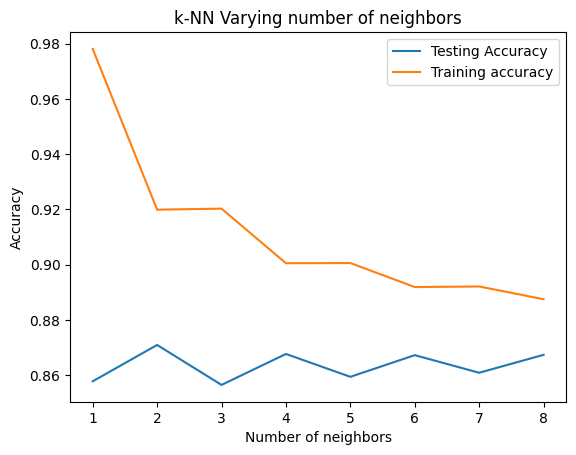

In [ ]:
# Visualizing evaluation Metric Score chart

# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(24,35)}
# Fit the Algorithm

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=3)
knn_cv.fit(X_train,y_train)

# Predict on the model

print('best_score: ',knn_cv.best_score_)
print('best_params: ',knn_cv.best_params_)
print('best_estimator: ',knn_cv.best_estimator_)
knn_cv=knn_cv.best_estimator_
knn_cv.fit(X_train,y_train)
y_train_knn=knn_cv.predict(X_train)
y_test_knn=knn_cv.predict(X_test)

accuracy_for_train=accuracy_score(y_train,y_train_knn)
accuracy_for_test=accuracy_score(y_test,y_test_knn)
roc_auc_score_train=roc_auc_score(y_train,y_train_knn)
roc_auc_score_test=roc_auc_score(y_test,y_test_knn)
confusion_matrix_train=confusion_matrix(y_train,y_train_knn)
confusion_matrix_test=confusion_matrix(y_test,y_test_knn)
classification_report_train=classification_report(y_train,y_train_knn)
classification_report_test=classification_report(y_test,y_test_knn)


print(f'Accurancy score for train dataset is {accuracy_for_train}')
print(f'Accurancy score for test dataset is {accuracy_for_test}')
print(f'roc auc score for train dataset is {roc_auc_score_train}')
print(f'roc auc score for test dataset is {roc_auc_score_test}')
print(f'confusion matrics for train dataset is \n {confusion_matrix_train}')
print(f'confusion matrics for test dataset is \n {confusion_matrix_test}')
print(f'confusion matrics for train dataset is \n {classification_report_train}')
print(f'confusion matrics for test dataset is \n {classification_report_test}')


best_score:  0.871432560927432
best_params:  {'n_neighbors': 34}
best_estimator:  KNeighborsClassifier(n_neighbors=34)
Accurancy score for train dataset is 0.8759927527347529
Accurancy score for test dataset is 0.8715126416739319
roc auc score for train dataset is 0.5385647403154742
roc auc score for test dataset is 0.5270937044738232
confusion matrics for train dataset is 
 [[254005   2255]
 [ 34157   3211]]
confusion matrics for test dataset is 
 [[63368   698]
 [ 8734   608]]
confusion matrics for train dataset is 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93    256260
           1       0.59      0.09      0.15     37368

    accuracy                           0.88    293628
   macro avg       0.73      0.54      0.54    293628
weighted avg       0.84      0.88      0.83    293628

confusion matrics for test dataset is 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     64066

##### Which hyperparameter optimization technique have you used and why?

* We used here GridSearch CV cross validation method to find best parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Slightly improving accuracy after changing n_neighbour.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 * All model have given same range of accuracy So we compare it by other parameter like precision ,f1,recall,etc.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* We selected knn_cv (knearest neighbour model cross validation) model for future prediction just because it is not only giving us best accuracy but also provide us best precision,recall f1 score.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 * We are using K_Nearest Neighbour model to predict in future, For best parameters we use cross validation and Find best parameters and finalized the models.
 * Below is list of most important Features.

In [ ]:
# Check which feature are more Important

# We use Shap with KarnelExplainer to check which feature are more important.
# Initialize the KernelExplainer
print('Import Feature are ')
explainer = shap.KernelExplainer(knn_cv.predict_proba, X_train[:1000])

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test[:1])

# Summary plot
shap.summary_plot(shap_values, X_test[:1],feature_names=features)



Import Feature are 


  0%|          | 0/1 [00:00<?, ?it/s]

## ***8.*** ***Future Work (Optional)***

* Dataset has highly contain No response as compare to Yes so we have to used TOMELINK  technique to control biasness.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File in pickle file
import pickle
pickle.dump(knn_cv,open('knn_cv1','wb'))


In [ ]:
# Save the File in joblib file
import joblib
joblib.dump(knn_cv,'knn_cv2')


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.(pickle file)
pickle1=pickle.load(open('knn_cv1','rb'))
pickle1.predict(X_train[:10])


In [ ]:
# Load the File and predict unseen data.(joblib file)
joblib1=joblib.load('knn_cv2')
joblib1.predict(X_train[:10])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Model has highest accuracy is 87 percent.
* Dataset has Response highely bias to No as compare to Yes so we have use TOMELINK technique to manage biasness of data.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***